# Transformer (+ 논문 구현)



트랜스포머는 2017년 구글에서 발표한 논문인 "Attention is all you need"에서 나온 모델로 seq2seq의 구조인 인코더 디코더를 따르면서도, 논문의 이름처럼 어텐션(Attention)만으로 구현한 모델이다.


- [트랜스포머 개념 이해를 위한 링크 : https://www.youtube.com/watch?v=p216tTVxues&t=3s ]

- [트랜스포머 실습을 위한 링크 : https://www.youtube.com/watch?v=dvK-TIFCL2Q ]

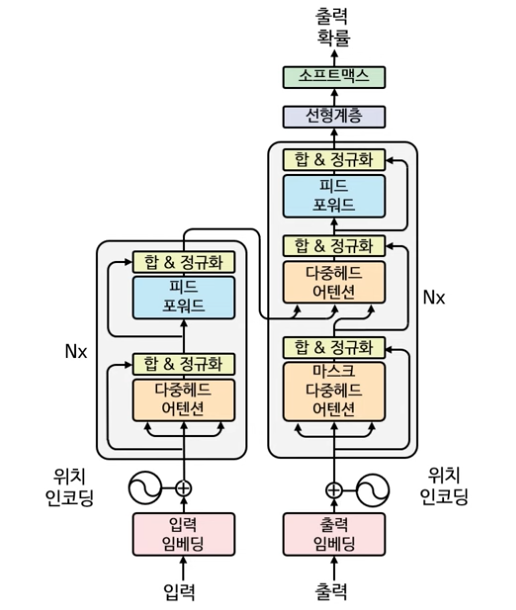

왼쪽은 encoder, 오른쪽은 decoder 부분으로 나눌 수 있다.

간단한 예시로 트랜스포머의 메카니즘을 상기 시켜보자.



# 인코더 (Encoder)

- 인코더는 입력 문장을 받아서 의미를 함축한 벡터(고정 길이 길이 또는 연속된 상태 벡터)로 변환

- 트랜스포머에서는 여러 층의 self-attention & FFN을 통해 단어들 간의 관계를 학습

- 결국, 문장의 의미를 압축하여 디코더가 활용할 수 있는 형태로 변환
- 즉, **추론 때** 디코더가 입력으로 받을 수 있도록, **encoder의 출력 행렬 차원**과 **디코더 입력 행렬 차원**은 **같아야 한다.**

# 데이터 전처리

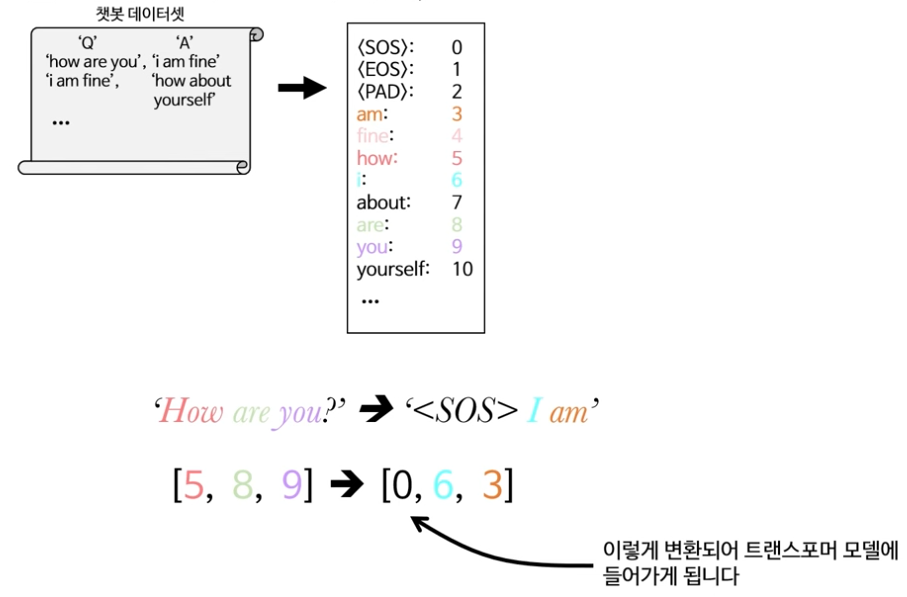

- 총 11개의 단어(token)이 있다고 가정한다.
- *이 예시에서는 편의상 3개의 토큰을 사용한다.

- 각 단어(token)에 고유 숫자(index)를 배정해서 모델이 처리할 수 있는 데이터로 변환해준다.


# 입력 임베딩 레이어

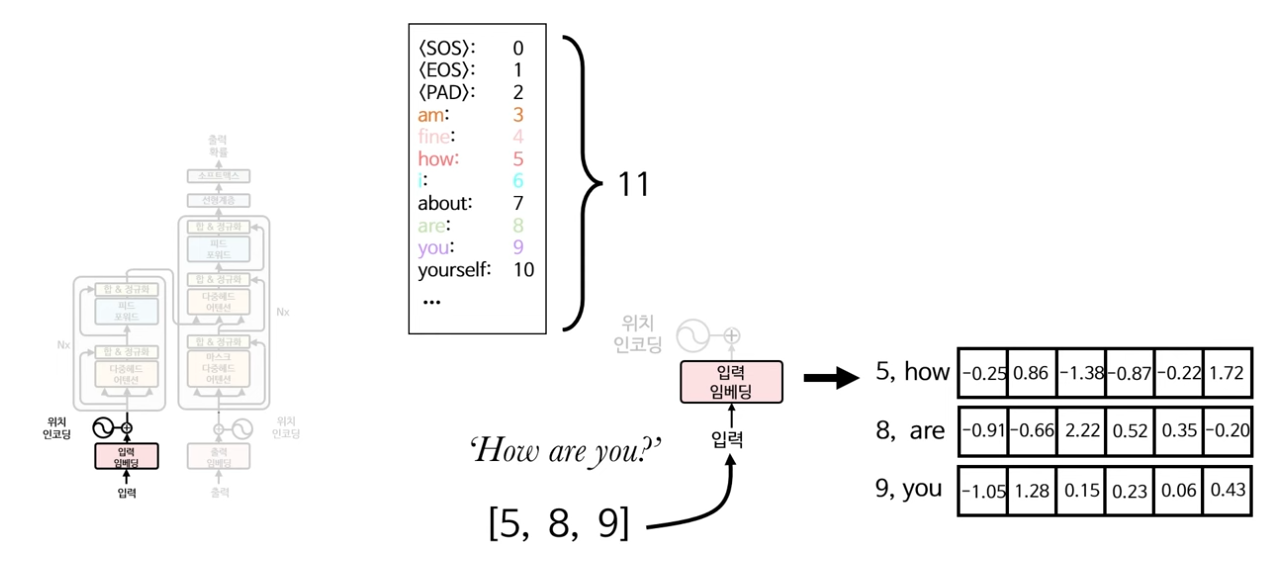

- 입력 임베딩은 들어온 입력을 11개의 단어들을 압축해서 길이가 6개인 밀집 벡터로 바꿔준다.

- 실제 논문에서는 37000개의 단어(token)를 512차원의 단어 임베딩으로 줄였다고 한다.

- 즉, 37000개의 단어를 압축해서 길이가 512개인 밀집 벡터로 바꿔줬다는 뜻이다.

- 이렇게 함으로써 많은 수의 단어를 효율적으로 정보를 내부적으로 처리할 수 있게 됩니다.

# 위치 인코딩

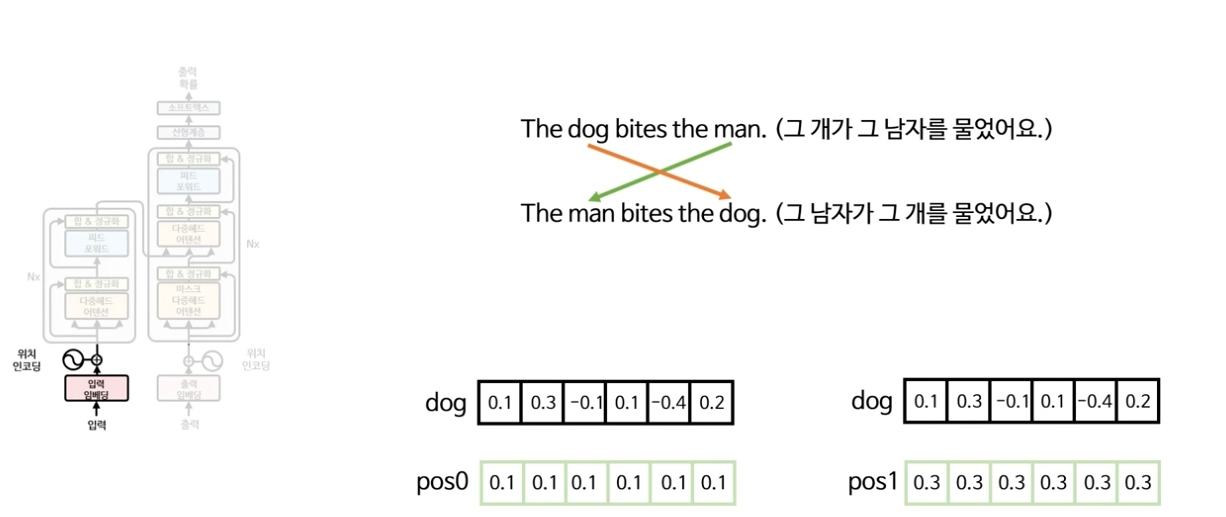

- 영어는 단어의 순서가 중요하다.

- 같은 단어 임베딩이라 할지라도, 순서에 따라 다른 의미가 된다.

- 그래서 고유한 위치 정보(pos0, pos1)를 같이 준다면, 개가 물었는지, 개가 물렸는지 보다 더 정확하게 의미를 전달 할 수 있다.

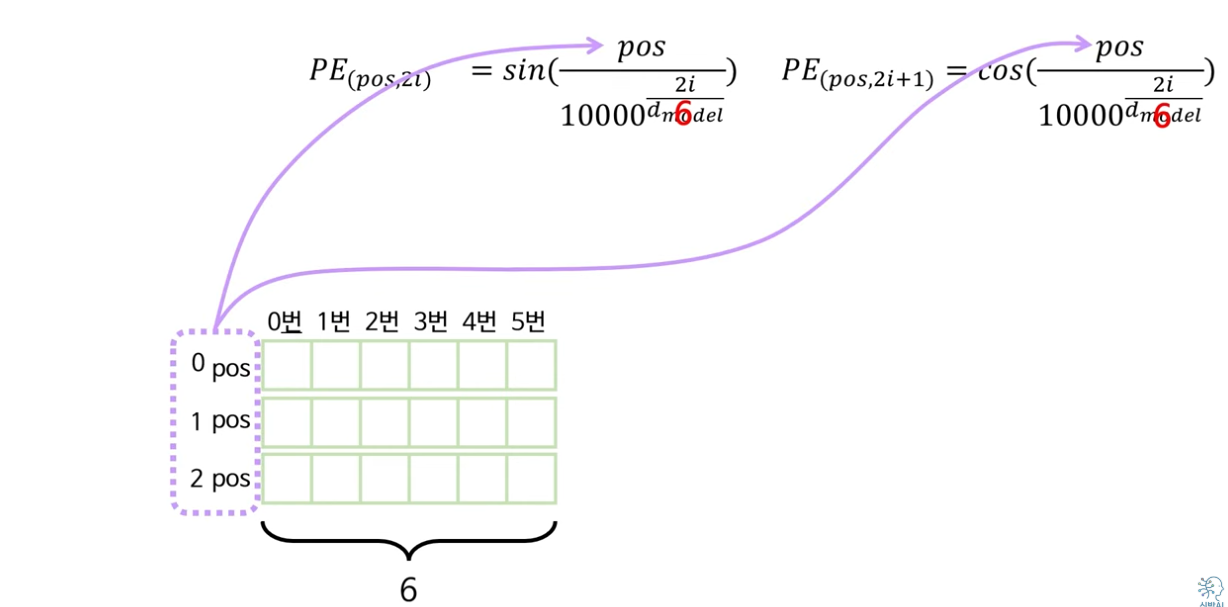

- pos에는 0, 1, 2가 차례로 들어가게 된다.

- 이 예제에서는 모델의 길이가 6이라는 것을 기억한다.

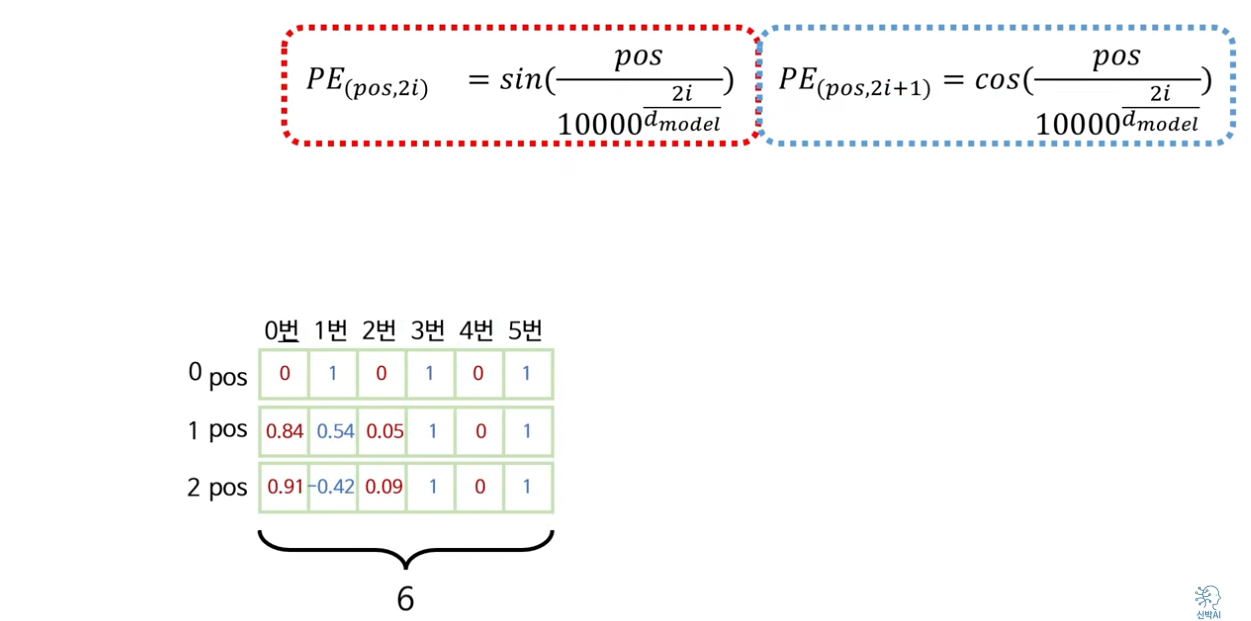

- **짝수**번째 단어는 **sin** 공식
- **홀수**번째 단어는 **cos** 공식

에 대입한다.


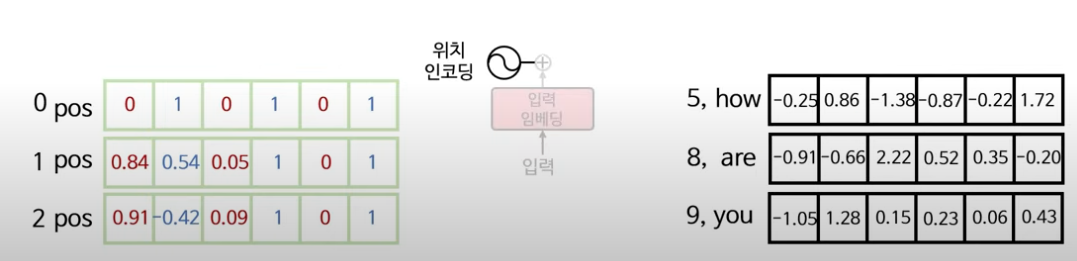

- 왼쪽에 **위치 인코딩**
- 오른쪽에 **입력 임베딩**

- 이 두 가지를 **더해준다**.

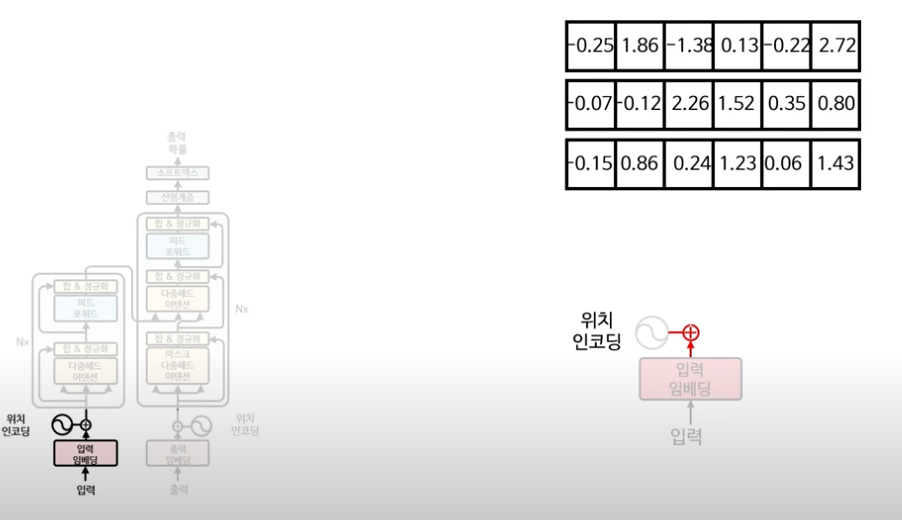

- **입력 + 위치 임베딩 벡터**가 나온다.

# 다중헤드 어텐션

- 트랜스포머는 **입력 문장 안**에서의 **자체 단어 간의 관계성**을 파악한다. -> **Self Attention**

- 아래 예시를 보면 각 단어가 다른 단어들 간의 관계성을 나타내는 것을 볼 수 있다.

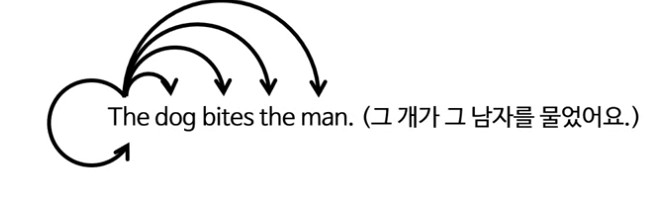

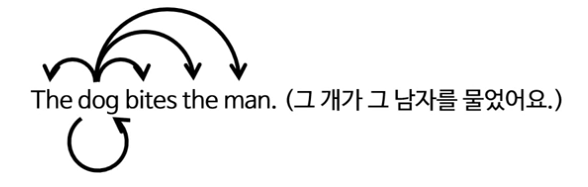

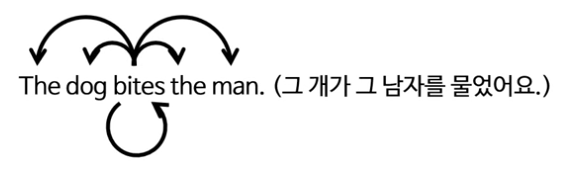

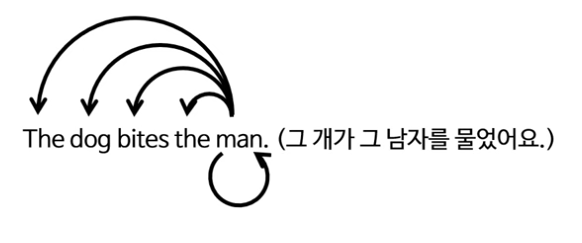


- 먼저 입력 값 Q, K, V를 먼저 구해준다.


1. 아까 **입력 + 위치 인코딩한 행렬**을 **세 개로 복사**한다.

2. **6 x 6 행렬**(랜덤 값을 가짐)을 만든다.

3. 두 가지를 **곱한다**.

4. Q, K, V **똑같은 방식을** **반복한다**.


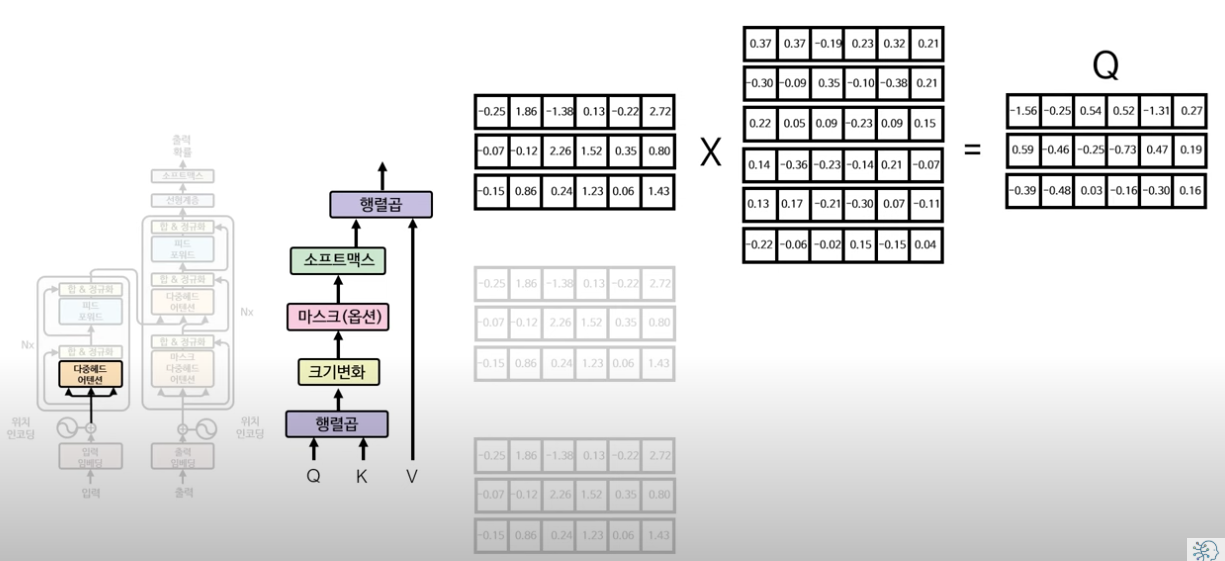

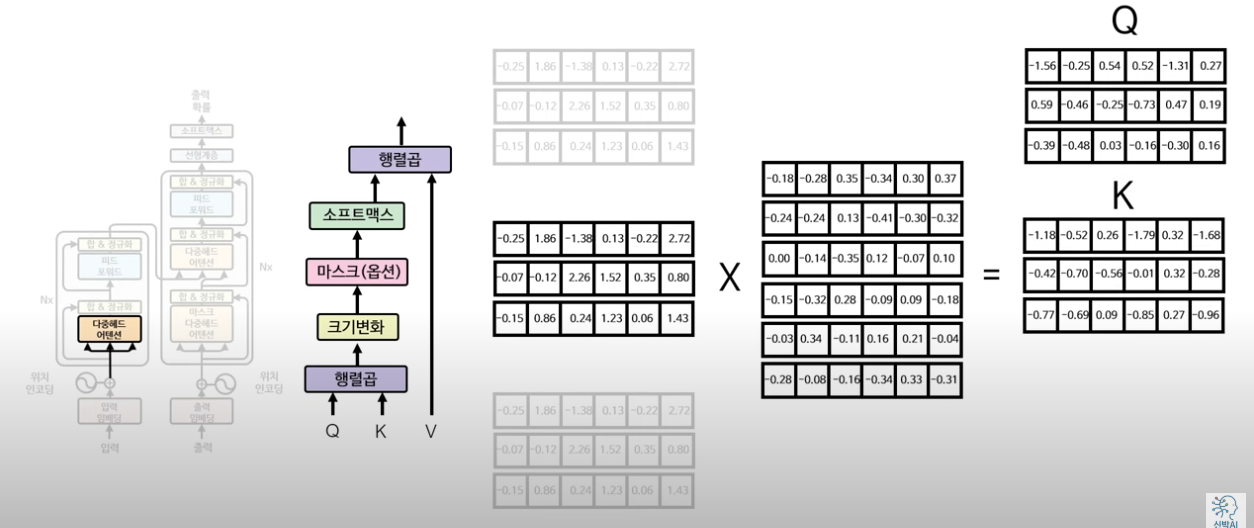

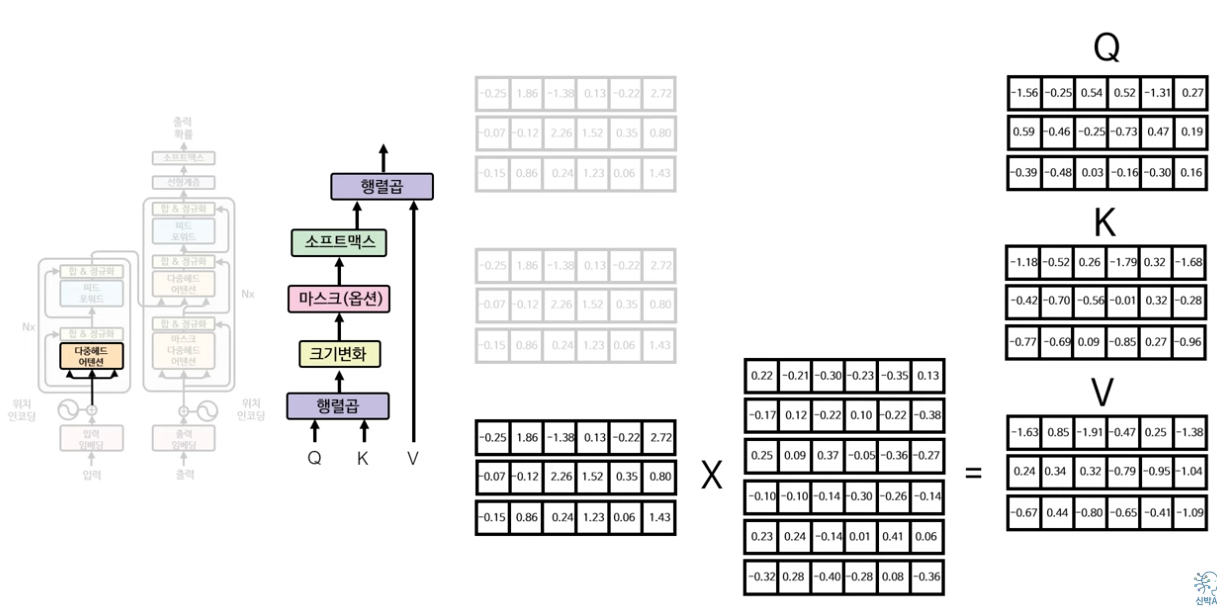

- Q, K, V 값을 다 구한 후에,


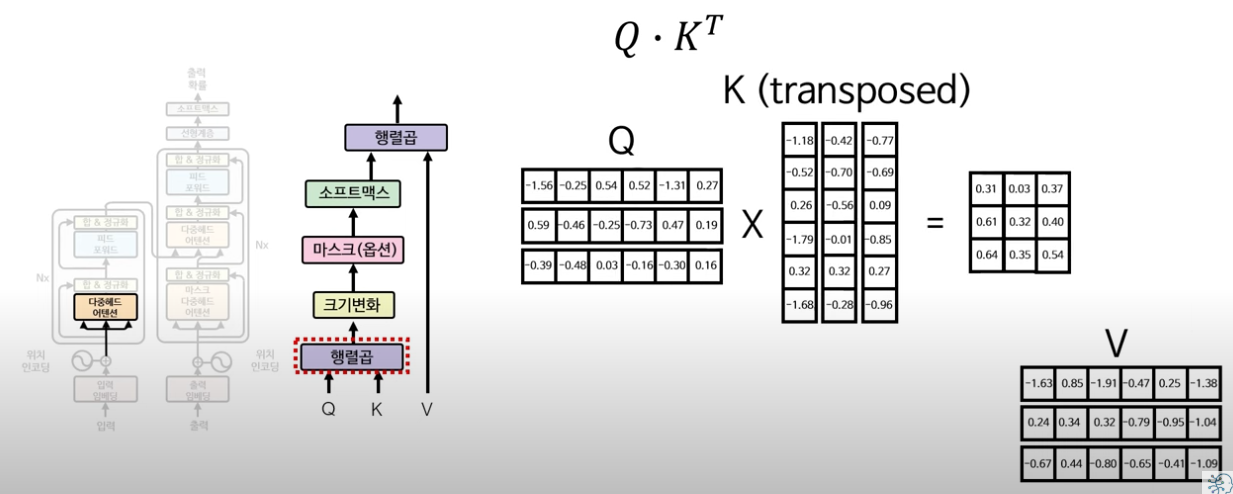

- 행렬곱 해준다.

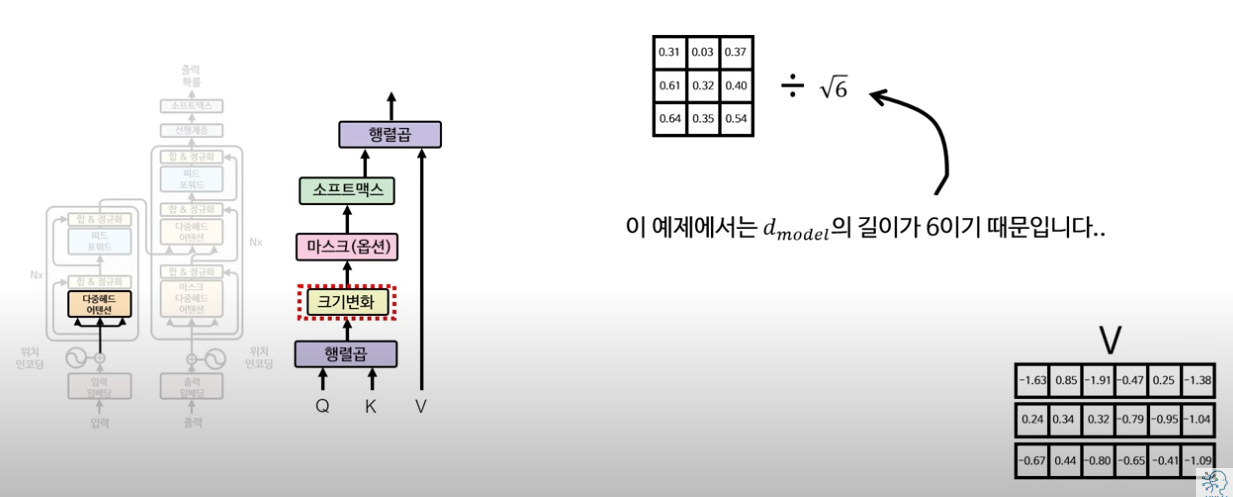

- *인코딩에서는 마스크 옵션을 사용하지 않는다.

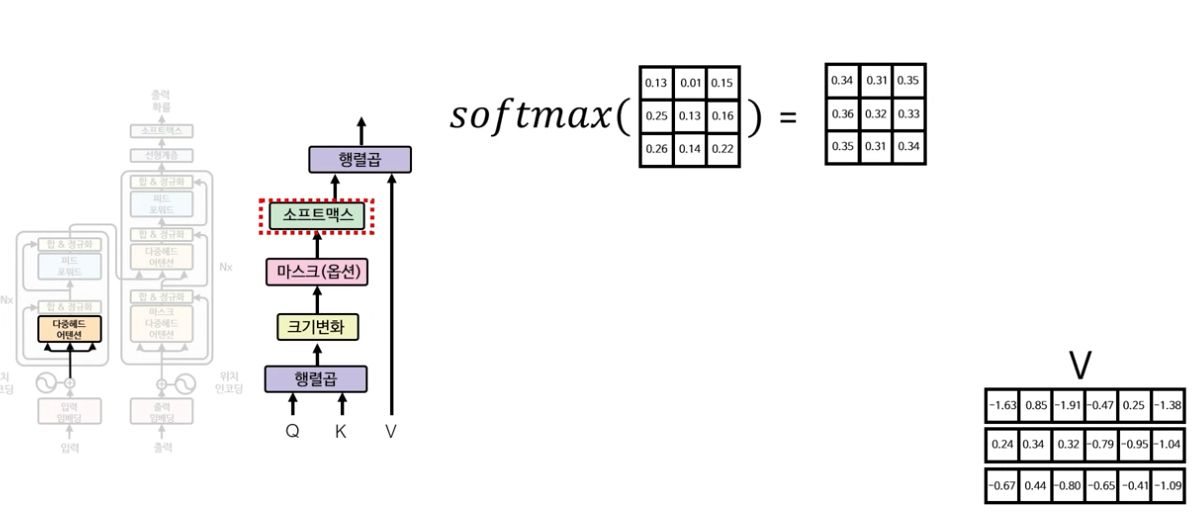

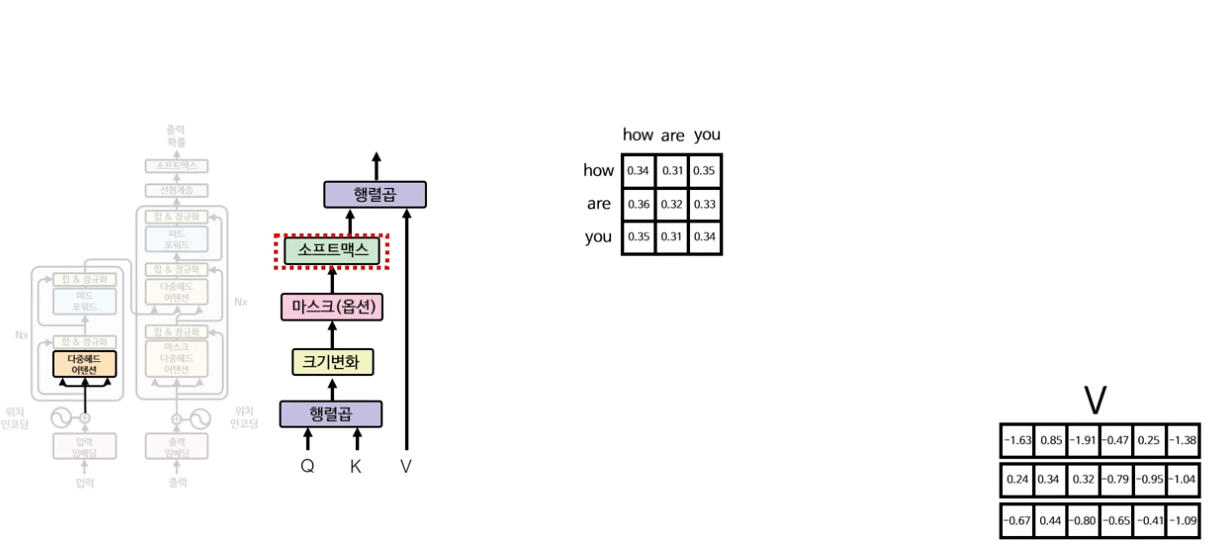

소프트 맥스를 거치면

- 관련이 높은 단어쌍은 높은 값을 갖고
- 관련이 낮은 단어쌍은 낮은 값을 갖도록


학습 될 것이다.

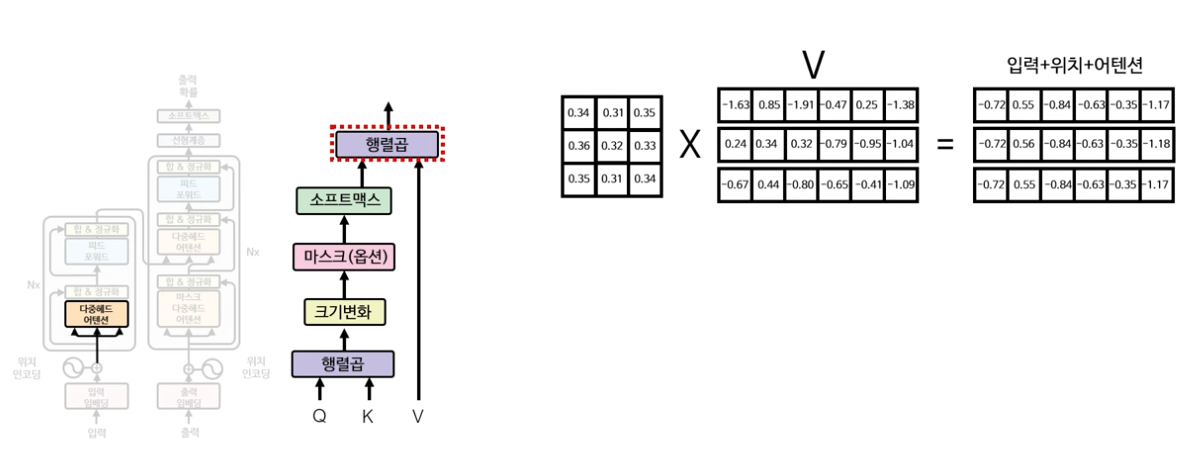

- 여기 까지가 헤드 한 개일 때 과정이다.

- 실제 논문에서는 8개의 다중 헤드를 사용했다.

- 헤드가 2개 일때는 아래와 같다.

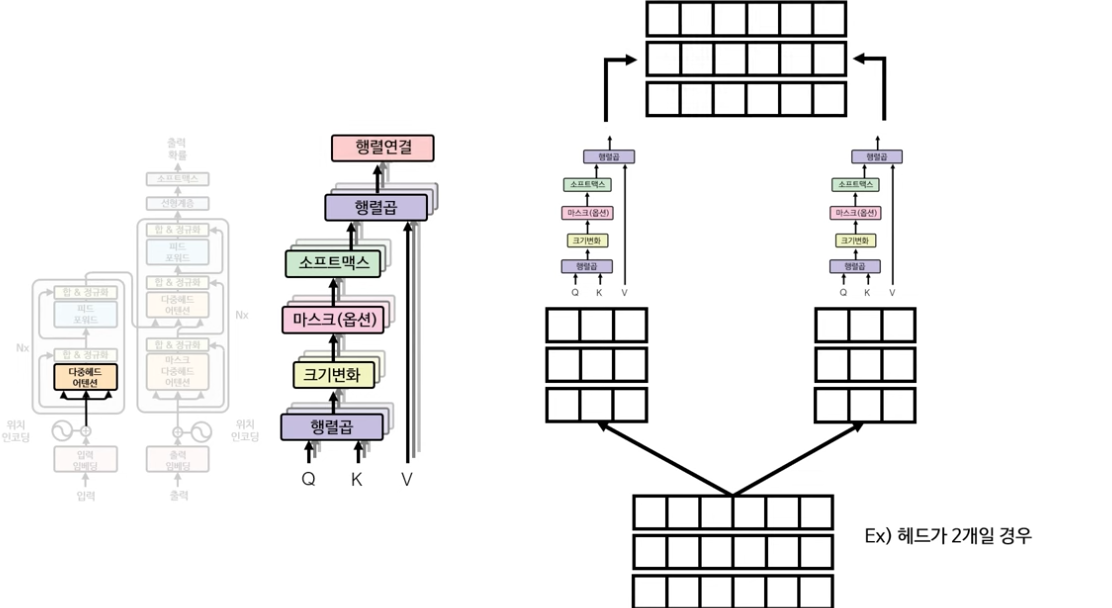

- Q, K, V의 단계에서부터 헤드의 숫자대로 나누어서 self-attention을 각각 계산해준 뒤에

- 행렬을 다시 연결(concatenate)해준다.


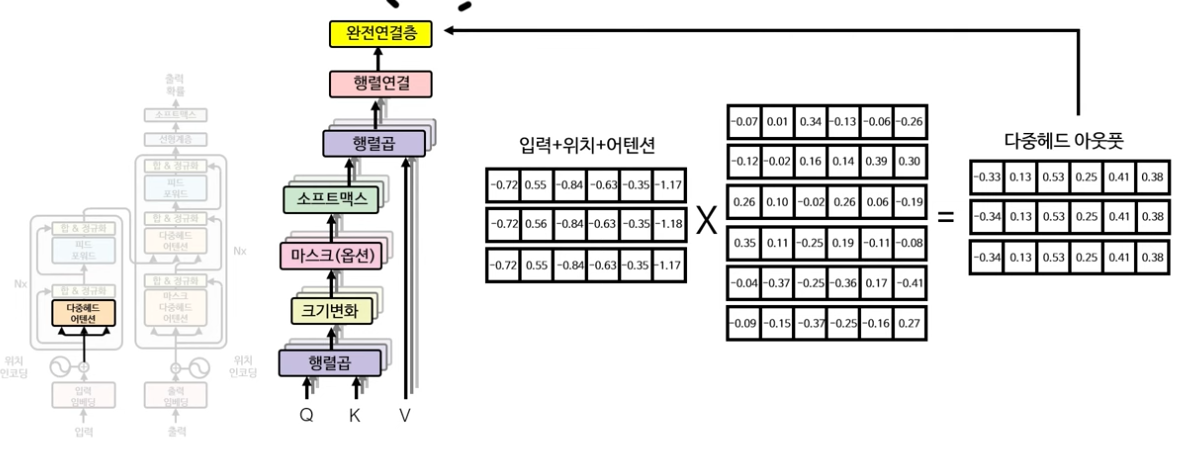

- 연결(concatenate)해준 행렬을 완전 연결층(Fully connected Layer)에 넣어주면, 다중헤드 어텐션의 최종 출력을 계산해 냅니다.


# 합 & 정규화

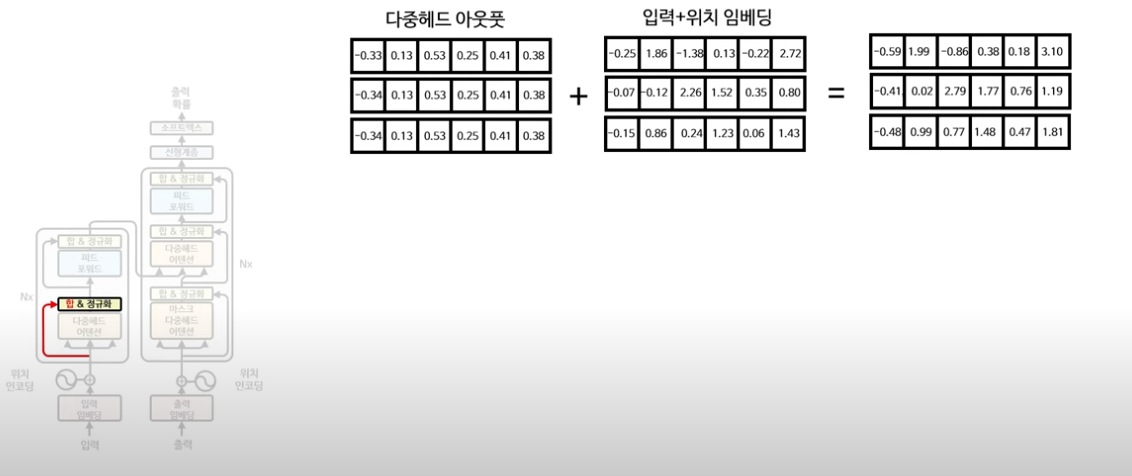

- 합 : 다중헤드 아웃풋과 입력+위치 임베딩을 더해주는 것이다.

# 왜 합을 할까 ?

- 학습 과정에서의 기울기 소실 문제 완화시키는 효과
- 기존의 정보를 어느 정도 보존하면서 새로운 정보(attention)을 가미하는 효과


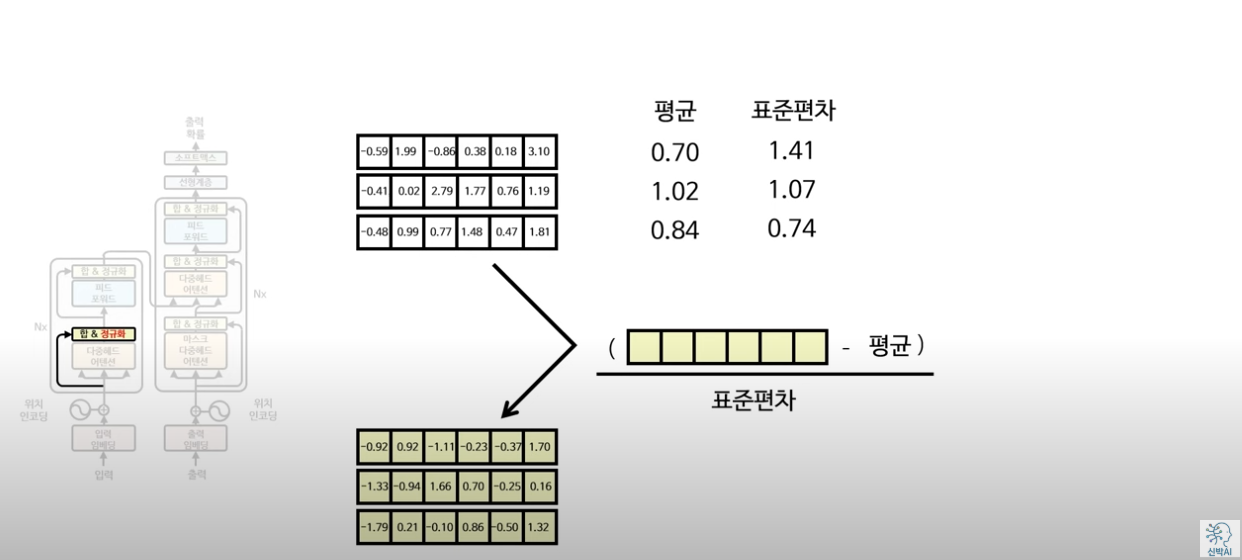

- 정규화 : 각 열별로 평균과 표준 편차를 구해서, 공식에 넣어주면 위에 보이는 행렬 값을 얻을 수 있다.


# 피드 포워드 (Feed Forward)

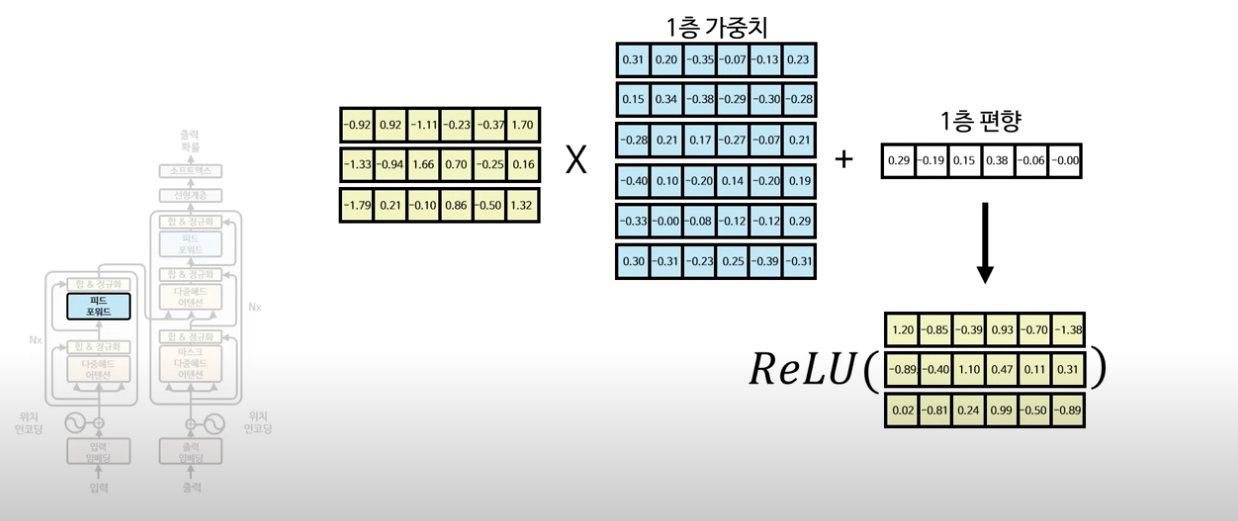

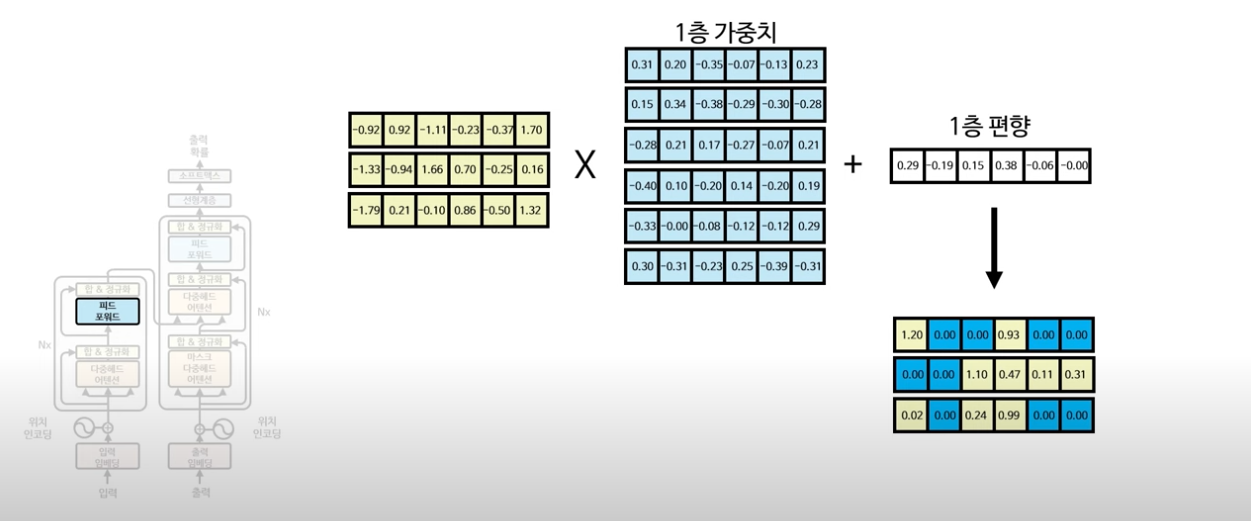

- 합 & 정규화를 해주고, 나온 값을 1층 가중치 + 1층 편향 해주고,

- 활성화 함수(Relu)에 넣어서 음수 값들은 0이 된다.

- 나온 출력 값을 같은 방법을 반복해서 2층 가중치 + 2층 편향을 넣어주면,



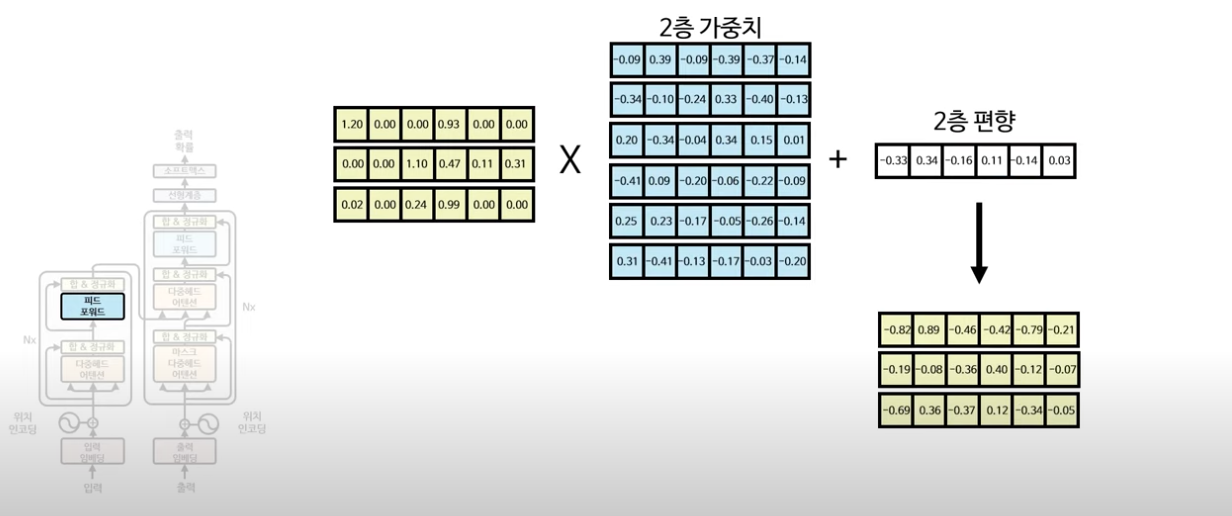

- 피드 포워드 레이어에 출력 값을 얻을 수 있다.






# Feed Forward layer는 왜 넣을까 ?



- 비선형성을 증가시켜 네트워크 자체가 데이터를 처리하고 분별할 수 있는 능력을 증가시키는데 목적을 두고 있다.

# 1, 2층 가중치와 편향은 어디서 얻는 것일까 ?



- 1층 가중치는 입력 단(input layer)에서 **랜덤한 값**으로 생성된다.
- 2층 가중치도 마찬가지로 **랜덤한 값**으로 생성된다.

- 후에 학습 과정안에 Optimizer를 통해 가중치가 업데이트 된다.

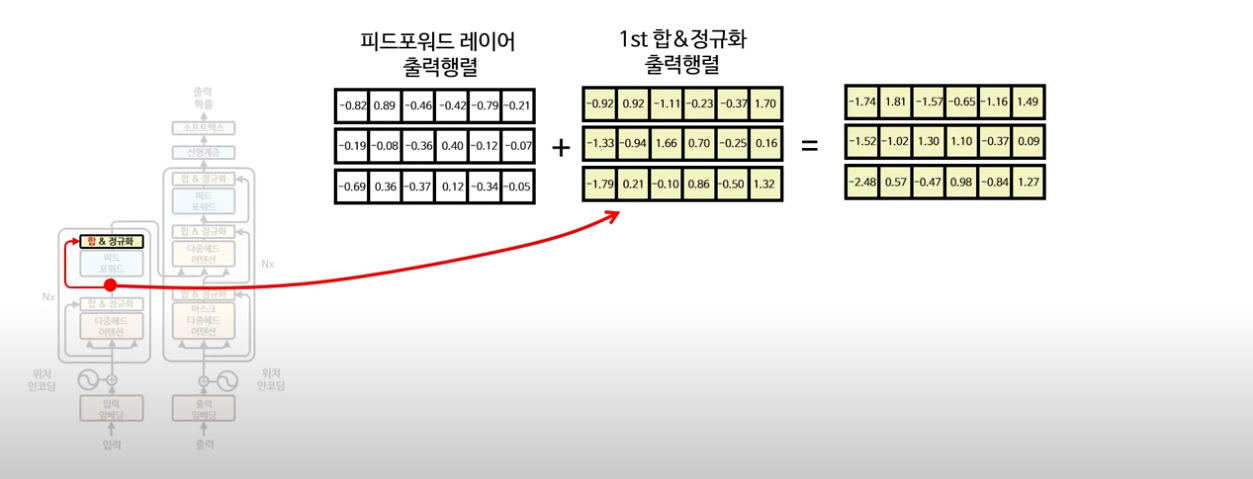

- 피드포워드 레이어를 거쳐서, 다시 합 & 정규화를 해주면

- **encoder 전체의 출력**이 된다.


# 디코더 (Decoder)

- 학습(Training)할 때는, 디코더는 정답 문장을 입력으로 받는다. (Teacher Forcing)

- 추론(inference)할 때는, 이전 시점에서 모델이 예측한 단어를 입력으로 받는다.

- 인코더가 생성한 벡터(전체 문장)를 기반으로 새로운 **문장**을 생성

예를 들어,

- 출력해야 할 문장 : "나는 고양이를 좋아해"

1. <SOS> -> 첫번째 단어 예측 ["나는" ]
2. 입력 : ["나는"] -> 두 번째 단어 예측 ["고양이를"]
3. 입력 : ["나는", "고양이를"] -> 세 번째 단어 예측 ["좋아해"]
4. 입력 : ["나는", "고양이를", "좋아해"] -> <EOS> 예측 -> 종료

# 단어 인코딩 & 위치 인코딩

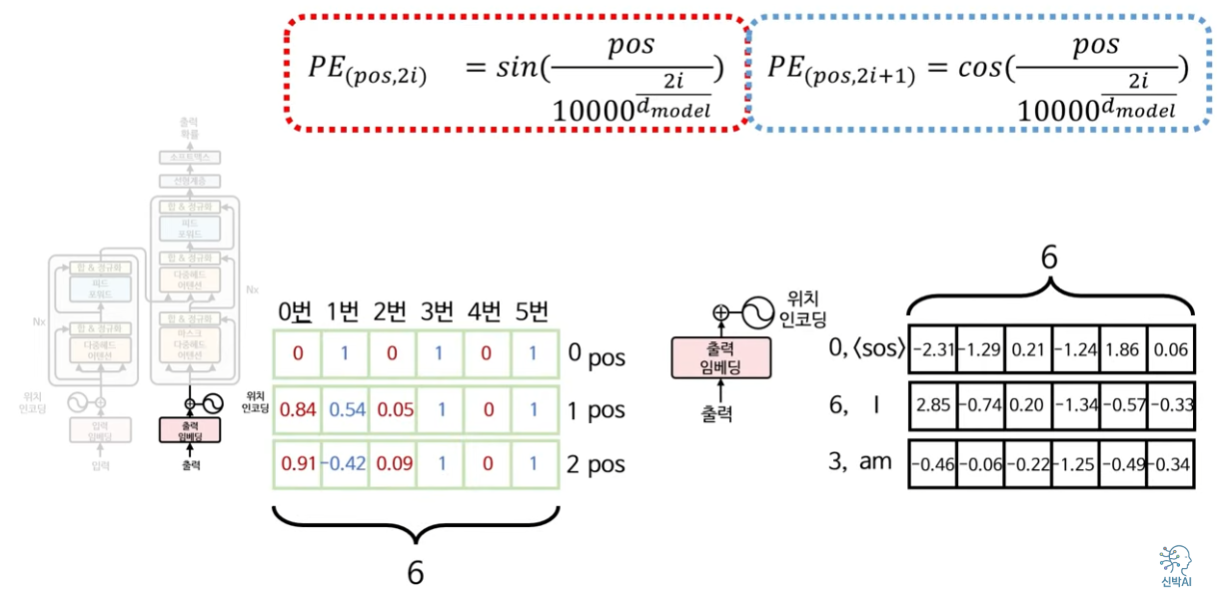

- 단어 인코딩과 위치 인코딩은 encoding때와 동일하다.
- 심지어 위치 인코딩은 기존에 계산한 값을 그대로 사용 가능하다.

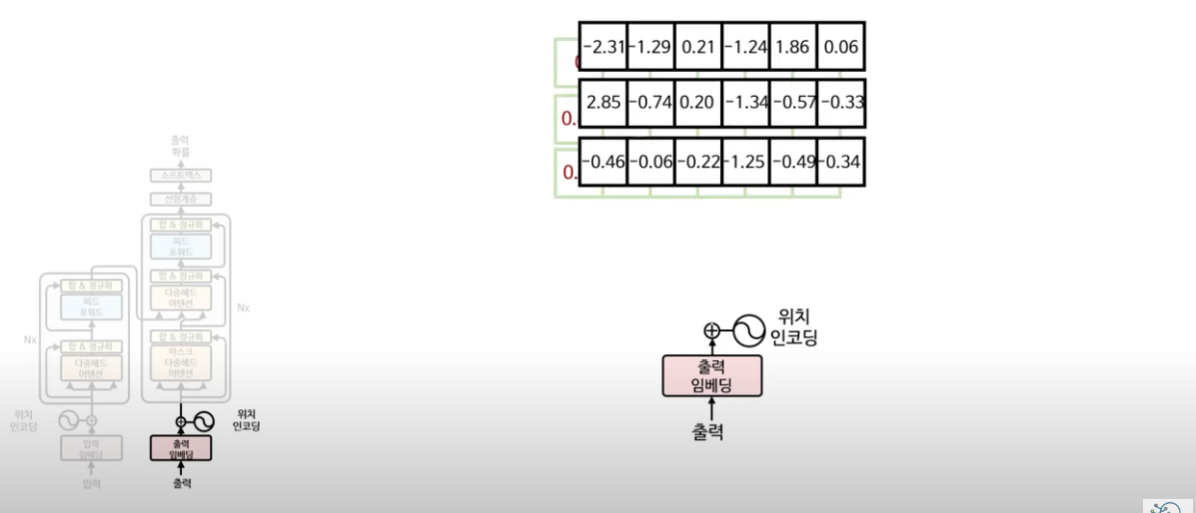

# 1st 마스크 다중헤드 어텐션

- 행렬곱과 크기변화는 encoding할 때와 같으므로, 따로 설명하지 않고 스킵한다.



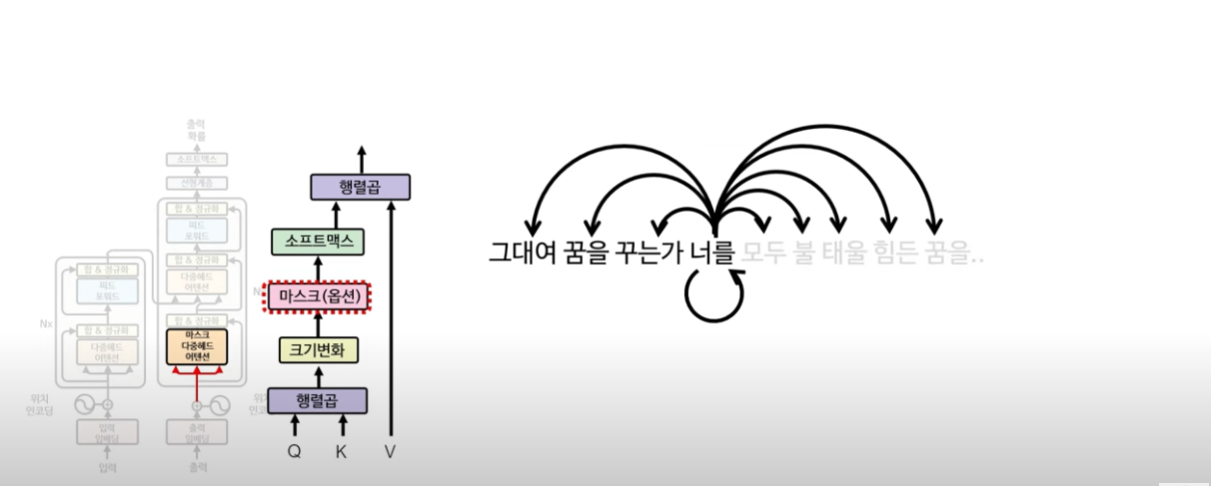

- **인코더의 경우** :
  - **입력 문장 전체의 의미를 파악**해야 하기 때문에 전체 단어들의 관계를 다 파악해야 할 필요가 있지만,

- **디코더의 경우** :
  - 출력 문장을 **한 단어씩 출력**하는 것이 목적이기 때문에
  
- 아직 **출력되지 않은 단어에 관심을 줄 수 없는 것**이 당연한 일이다.

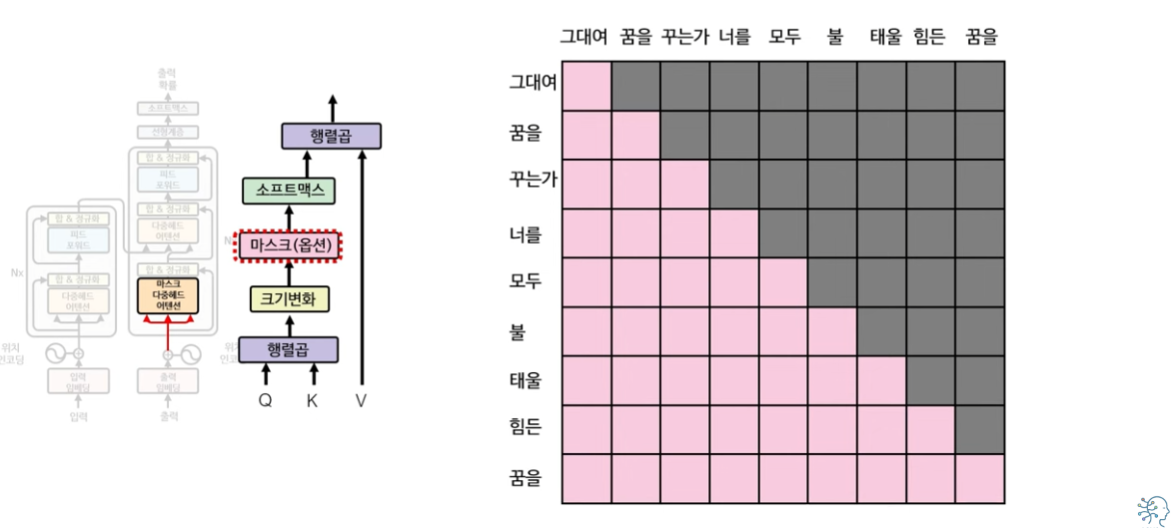

- 특정 단어 기준으로 미래에 나오는 단어는 가려서 계산에 영향을 주지 않도록 하는 것이 핵심이다.

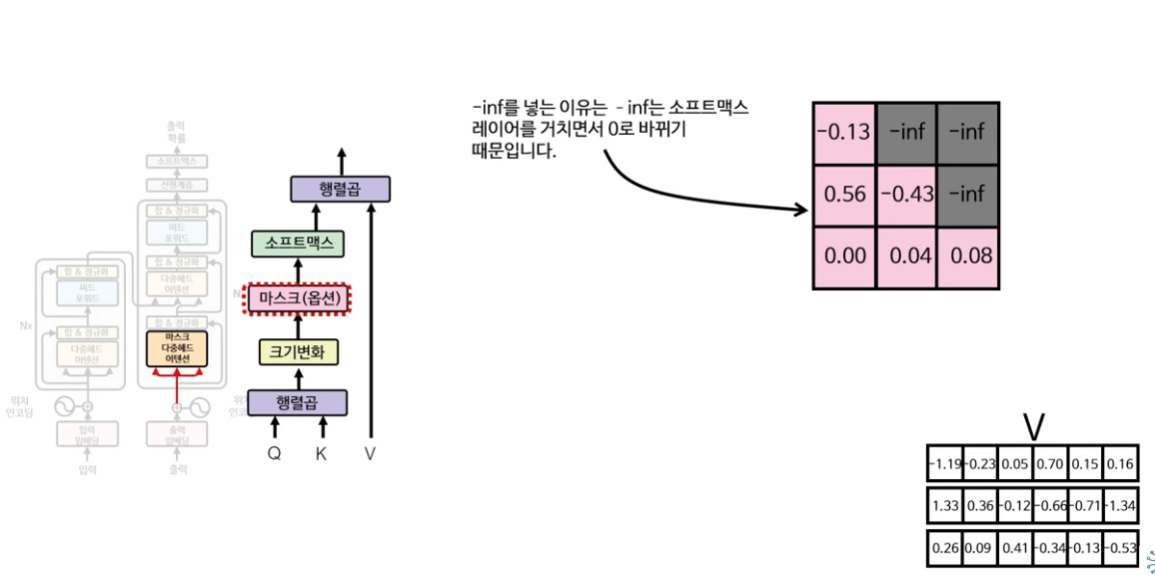

- 이런 마스크 알고리즘을 좀 전에 구한 어텐션 행렬에 적용하면, 위에 사진처럼 바뀐다.

- -무한대 값을 넣어준 것은 소프트 맥스를 거치면 0이 되기 때문이다.


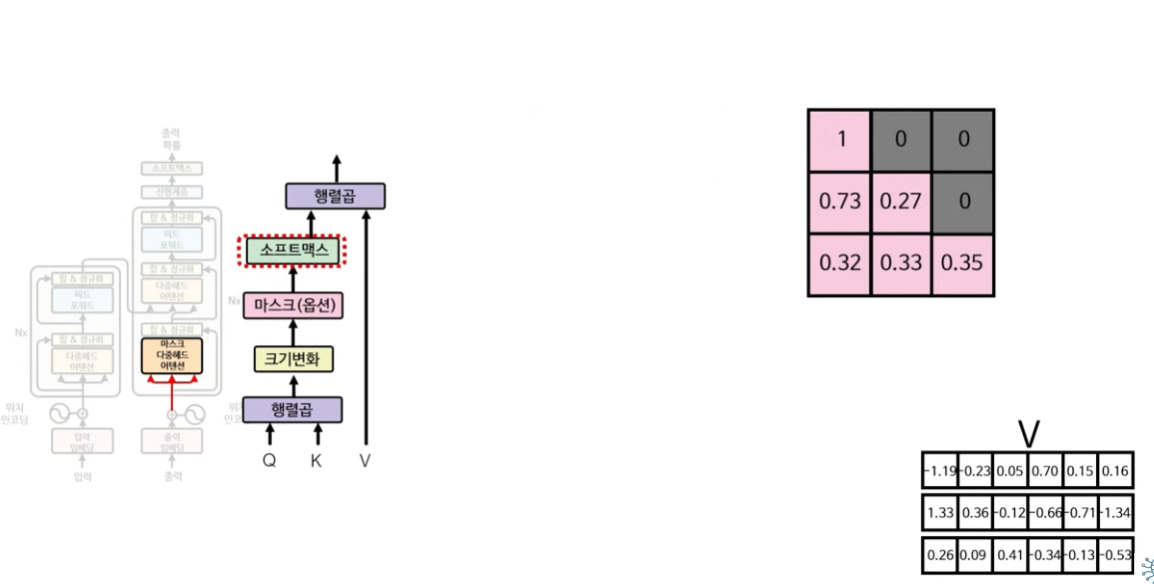

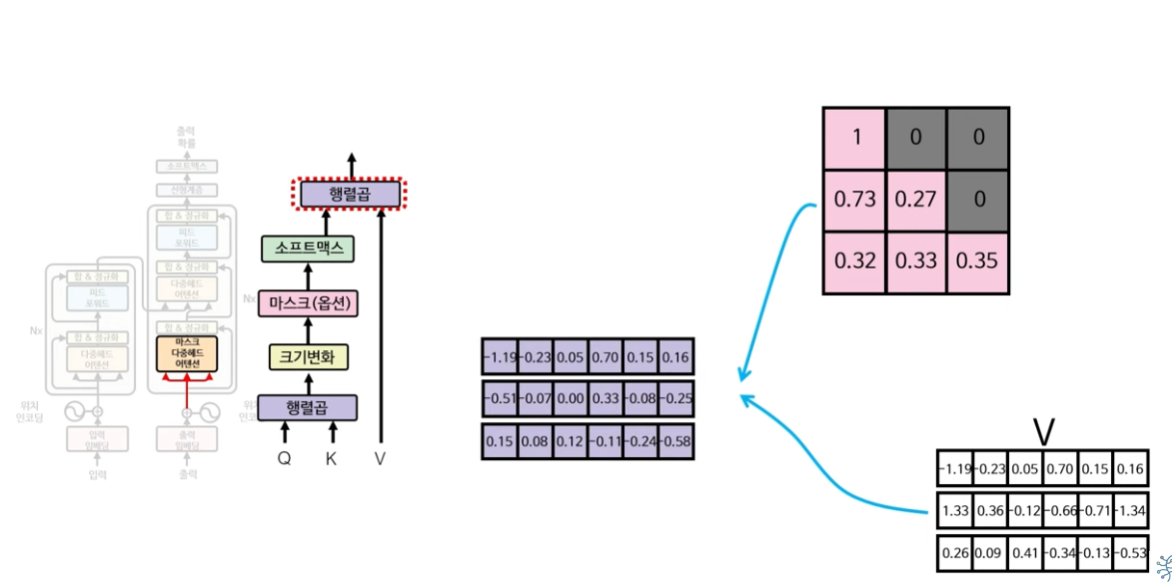

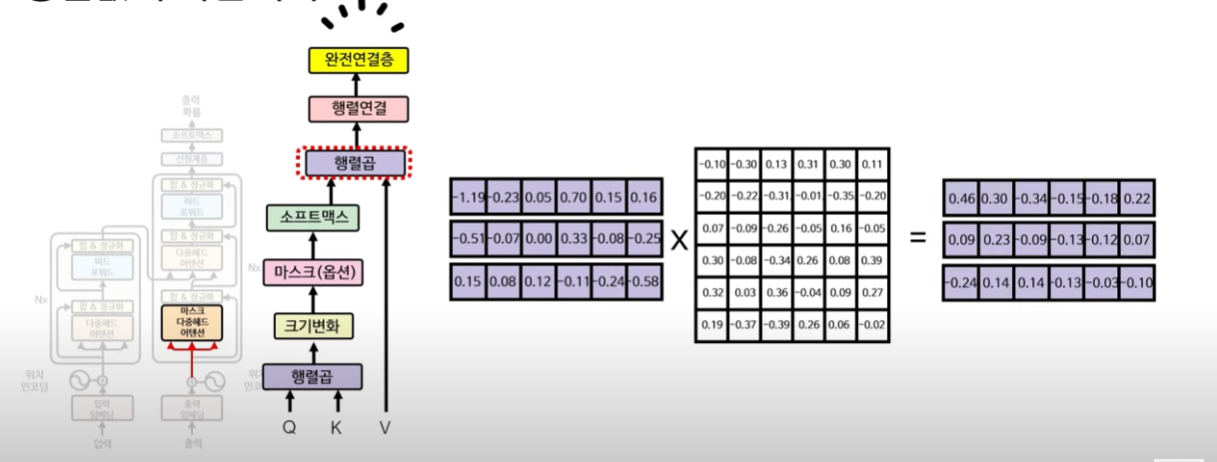

# 2st 다중헤드 어텐션

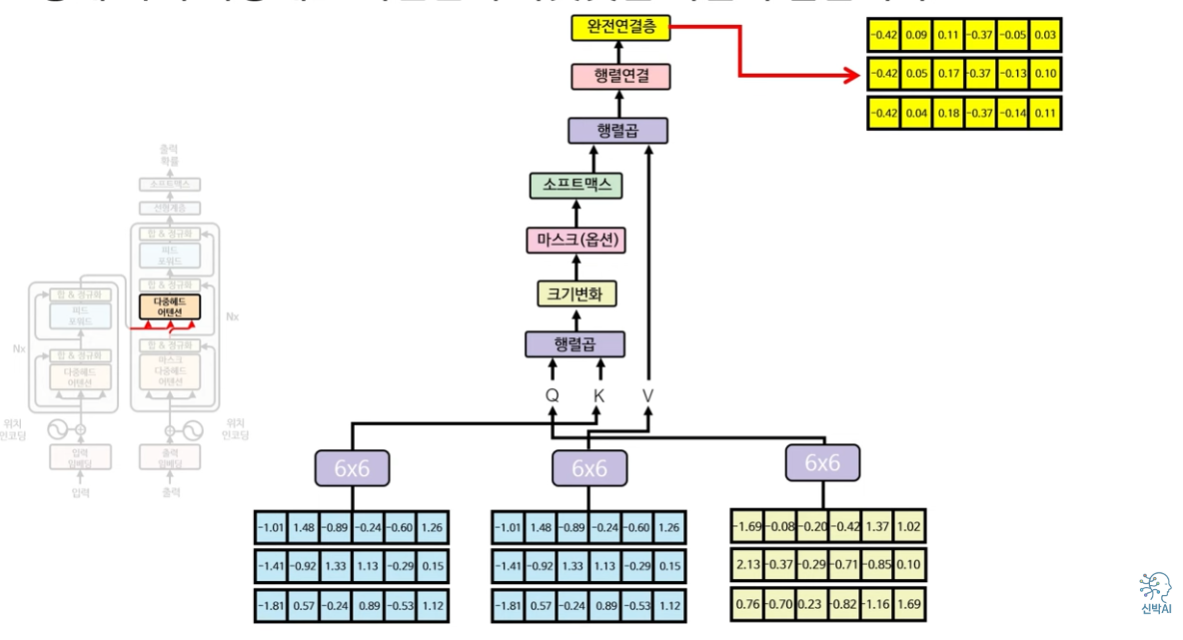

입력 값으로,

- K, V
  - Encoder의 출력 값
- Q
  - Decoder의 출력 값(마스크 다중헤드 어텐션을 거친 값)

를 받는다.

*뒤에 연산은 이전에 설명했기 때문에 생략한다.



# 선형 계층 & 소프트 맥스

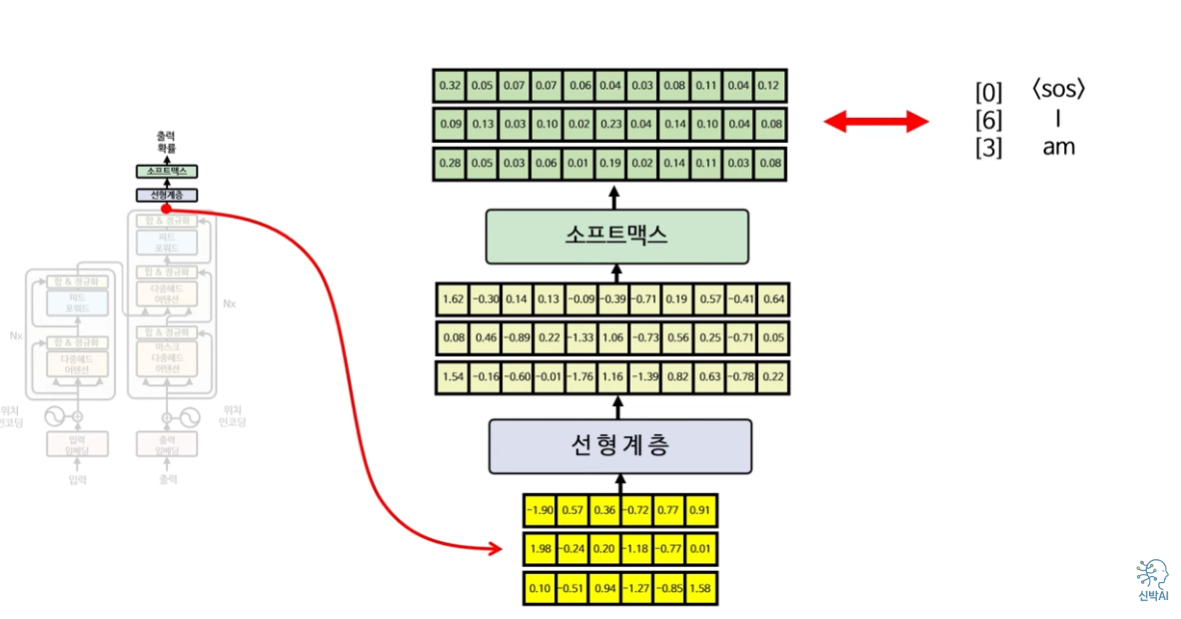

- 선형 계층을 통해서 원래 단어장 Voca 길이 ( =11) 만큼 다시 회복한다.

  - 원래 11개의 단어를 6개의 길이 벡터로 줄여서 계산했다.

  - 마지막에는 11개의 단어들을 찾아내야 하기 때문에, 선형 계층을 통해서 11개(단어장 길이)로 펼치는 것이다.

- 그러고 나서 최종 정답인 0,6,3을 비교한 후, 크로스 엔트로피 등의 손실함수와 역전파를 사용하여 모든 레이어들의 가중치 값들을 조절해 가는 것이 트랜스포머의 학습과정이다.


# 코드로 만들기

독일어를 영어로 번역하는 작업을 진행 할 수 있는 모델을 만드는 것이 목적이다.

## - 데이터셋 불러오기 & 전처리

In [1]:
!pip install torch<=1.2.0
!pip install torchtext==0.4.0
!pip install portalocker

/bin/bash: line 1: =1.2.0: No such file or directory
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 46.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installa

In [2]:
!pip install -U spacy

In [3]:
!python -m spacy download de_core_news_sm
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 64.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 77.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
import torch
import portalocker
import spacy
import torchtext

print(f"torch 버전: {torch.__version__}")
print(f"torchtext 버전: {torchtext.__version__}")

torch 버전: 2.6.0+cu124
torchtext 버전: 0.4.0


# Spacy

는 파이썬의 자연어 처리 라이브러리인 spaCy에서 제공하는 독일어와 영어에 대한 소형 언어 모델이다. 이러한 모델은 해당 언어의 텍스트를 본석하고 처리하는데 사용되며 품사태깅, 의존 구문 분석, 개체명 인식 등 다양한 NLP 작업을 수행할 수 있습니다.

- 언어코드 : **de, en** - 독일어, 영어
- 모델유형 : **core,news** - 일반적인 목적, 뉴스데이터 특화
- 사이즈 : **sm, md, lg** - sm = 소형, md = 중형, lg = 대형

[출처 : https://ungodly-hour.tistory.com/37]



In [5]:
nlp_de = spacy.load('de_core_news_sm') # 독일어 모델 로드 (news 기반)
nlp_en = spacy.load('en_core_web_sm') # 영어 모델 로드 (Wep 기반)

In [6]:
text = 'Yuh-jung Youn won the Oscar for best supporting actress for her performance in "Minari" on Sunday and made history by becoming the first Korean actor to win an Academy Award.'
doc = nlp_en(text)

for i, token in enumerate(doc):
  print(f"Token {i+1}: {token.text}")


Token 1: Yuh
Token 2: -
Token 3: jung
Token 4: Youn
Token 5: won
Token 6: the
Token 7: Oscar
Token 8: for
Token 9: best
Token 10: supporting
Token 11: actress
Token 12: for
Token 13: her
Token 14: performance
Token 15: in
Token 16: "
Token 17: Minari
Token 18: "
Token 19: on
Token 20: Sunday
Token 21: and
Token 22: made
Token 23: history
Token 24: by
Token 25: becoming
Token 26: the
Token 27: first
Token 28: Korean
Token 29: actor
Token 30: to
Token 31: win
Token 32: an
Token 33: Academy
Token 34: Award
Token 35: .


In [7]:
def tokenize_de(text):
  return [token.text for token in nlp_de(text)]

def tokenize_en(text):
  return [token.text for token in nlp_en(text)]

print(tokenize_en(text))

['Yuh', '-', 'jung', 'Youn', 'won', 'the', 'Oscar', 'for', 'best', 'supporting', 'actress', 'for', 'her', 'performance', 'in', '"', 'Minari', '"', 'on', 'Sunday', 'and', 'made', 'history', 'by', 'becoming', 'the', 'first', 'Korean', 'actor', 'to', 'win', 'an', 'Academy', 'Award', '.']


In [8]:
from torchtext.data import Field

source = Field(tokenize=tokenize_de, init_token='', eos_token='', lower=True, batch_first=True)
target = Field(tokenize=tokenize_en, init_token='', eos_token='', lower=True, batch_first=True)

In [9]:
# 데이터를 저장할 디렉토리 생성
!mkdir -p data/multi30k

# training 데이터 다운로드 및 압축 해제
!wget https://raw.githubusercontent.com/neychev/small_DL_repo/master/datasets/Multi30k/training.tar.gz -O data/multi30k/training.tar.gz
!tar -xvzf data/multi30k/training.tar.gz -C data/multi30k
!rm data/multi30k/training.tar.gz

# validation 데이터 다운로드 및 압축 해제
!wget https://raw.githubusercontent.com/neychev/small_DL_repo/master/datasets/Multi30k/validation.tar.gz -O data/multi30k/validation.tar.gz
!tar -xvzf data/multi30k/validation.tar.gz -C data/multi30k
!rm data/multi30k/validation.tar.gz

# test 데이터 다운로드 및 압축 해제
!wget https://raw.githubusercontent.com/neychev/small_DL_repo/master/datasets/Multi30k/mmt16_task1_test.tar.gz -O data/multi30k/mmt16_task1_test.tar.gz
!tar -xvzf data/multi30k/mmt16_task1_test.tar.gz -C data/multi30k
!rm data/multi30k/mmt16_task1_test.tar.gz

# Multi30k에 사용되려면 이름을 변경해줘야 함
!mv '/content/data/multi30k/test.de' '/content/data/multi30k/test2016.de'
!mv '/content/data/multi30k/test.en' '/content/data/multi30k/test2016.en'

!ls /content/data/multi30k/

--2025-04-16 11:29:28--  https://raw.githubusercontent.com/neychev/small_DL_repo/master/datasets/Multi30k/training.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1207136 (1.2M) [application/octet-stream]
Saving to: ‘data/multi30k/training.tar.gz’

data/multi30k/train 100%[===================>]   1.15M  --.-KB/s    in 0.04s   

2025-04-16 11:29:28 (28.6 MB/s) - ‘data/multi30k/training.tar.gz’ saved [1207136/1207136]

train.de
train.en
--2025-04-16 11:29:28--  https://raw.githubusercontent.com/neychev/small_DL_repo/master/datasets/Multi30k/validation.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.

In [10]:
from torchtext.datasets import Multi30k

# 10분 넘게 걸림 주의
train_dataset, valid_dataset, test_dataset = Multi30k.splits(
      exts=('.de', '.en'),
      fields=(source, target),
      root='/content/data'  # Google Colab의 기본 작업 디렉토리
  )


In [11]:
print(f"학습 데이터셋(training dataset) 크기: {len(train_dataset)}개")
print(f"평가 데이터셋(validation dataset) 크기: {len(valid_dataset)}개")
print(f"테스트 데이터셋(testing dataset) 크기: {len(test_dataset)}개")

print(type(train_dataset))
print(train_dataset[0])
print(train_dataset.fields)
print(train_dataset[0].src)
print(train_dataset[0].trg)

학습 데이터셋(training dataset) 크기: 29000개
평가 데이터셋(validation dataset) 크기: 1014개
테스트 데이터셋(testing dataset) 크기: 1000개
<class 'torchtext.datasets.translation.Multi30k'>
{'src': <torchtext.data.field.Field object at 0x7f5dc459cdd0>, 'trg': <torchtext.data.field.Field object at 0x7f5cad4f9290>}
['zwei', 'junge', 'weiße', 'männer', 'sind', 'im', 'freien', 'in', 'der', 'nähe', 'vieler', 'büsche', '.']
['two', 'young', ',', 'white', 'males', 'are', 'outside', 'near', 'many', 'bushes', '.']


Python에서는 클래스에 메서드인 __getitem__을 정의하면, 해당 클래스의 인스턴스에 대해 인덱싱연산(obj[0])을 사용할 수 있다.

In [12]:
source.build_vocab(train_dataset, min_freq=2)
target.build_vocab(train_dataset, min_freq=2)

print(f"len(source): {len(source.vocab)}")
print(f"len(target): {len(target.vocab)}")
print(f"Padding idx: {source.vocab.stoi[source.pad_token]}")

print(target.vocab.stoi["hello"]) # 없는 단어: 0

len(source): 7852
len(target): 5892
Padding idx: 1
4111


In [13]:
import torch
from torchtext.data import Field, BucketIterator

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 일반적인 데이터 로더(data loader)의 iterator와 유사하게 사용 가능
train_iterator, valid_iterator, test_iterator = BucketIterator.splits(
    (train_dataset, valid_dataset, test_dataset),
    batch_size=128,
    device=device
    )


In [14]:
for i, batch in enumerate(train_iterator):
    src = batch.src
    trg = batch.trg

    print(f"source 첫 번째 배치 크기: {src.shape}")
    # src: [batch_size, src_len] ex) torch.Size([32, 128]
    print(f"target 첫 번째 배치 크기: {trg.shape}")
    # trg: [batch_size, src_len] ex) torch.Size([29, 128]

    # 현재 배치에 있는 하나의 문장에 포함된 정보 출력
    for i in range(trg.shape[1]):
        print(f"인덱스 {i}: {trg[1][i].item()}") # 여기에서는 [Seq_num, Seq_len]

    # 첫 번째 배치만 확인
    break

source 첫 번째 배치 크기: torch.Size([128, 26])
target 첫 번째 배치 크기: torch.Size([128, 28])
인덱스 0: 2
인덱스 1: 250
인덱스 2: 2092
인덱스 3: 49
인덱스 4: 21
인덱스 5: 25
인덱스 6: 2531
인덱스 7: 41
인덱스 8: 1065
인덱스 9: 10
인덱스 10: 30
인덱스 11: 1142
인덱스 12: 372
인덱스 13: 7
인덱스 14: 3
인덱스 15: 30
인덱스 16: 137
인덱스 17: 4
인덱스 18: 2
인덱스 19: 1
인덱스 20: 1
인덱스 21: 1
인덱스 22: 1
인덱스 23: 1
인덱스 24: 1
인덱스 25: 1
인덱스 26: 1
인덱스 27: 1



# Multi-Head Attention 다중헤드어텐션

In [15]:
import torch.nn as nn

class MultiHeadAttention(nn.Module):
    def __init__(self, hidden_dim, n_heads, dropout_ratio):
        super(MultiHeadAttention, self).__init__()

        self.hidden_dim = hidden_dim # 임베딩의 차원, 입력 및 출력의 차원을 정의한다.
        self.n_heads = n_heads # 어텐션 헤드의 개수
        self.head_dim  = hidden_dim // n_heads # 각 헤드(head)에서 쪼개진 임베딩 차원


        self.fc_Q = nn.Linear(hidden_dim, hidden_dim) # Query 값에 적용될 가중치와 편향을 가진 선형 계산식
        self.fc_K = nn.Linear(hidden_dim, hidden_dim) # Key 값에 적용될 가중치와 편향을 가진 선형 계산식
        self.fc_V = nn.Linear(hidden_dim, hidden_dim) # Value 값에 적용될 가중치와 편향을 가진 선형 계산식
        self.scale = torch.sqrt(torch.FloatTensor([self.head_dim])).to(device) # 크기변화에 사용될 값

        self.fc_o = nn.Linear(hidden_dim, hidden_dim) # 계산한 모든 값을 합쳐줄 계산식

        self.dropout = nn.Dropout(dropout_ratio)




    def forward(self, query, key, value, mask=None):

        # query: [batch_size, query_len, hidden_dim]
        # key: [batch_size, key_len, hidden_dim]
        # value: [batch_size, value_len, hidden_dim]

        # query_len은 입력 시퀀스의 길이를 나타낸다
        # 예를 들어, 문장이 "안녕하세요"라면, 5개의 토큰으로 query_len = 5


        batch_size = query.size(0) # 128

        Q = self.fc_Q(query)
        K = self.fc_K(key)
        V = self.fc_V(value)

        # Q: [batch_size, query_len, hidden_dim]
        # K: [batch_size, key_len, hidden_dim]
        # V: [batch_size, value_len, hidden_dim]

        # 각 헤드 단위로 연산 해야 하기 때문에 n_heads를 두 번째 차원으로 옮긴다. 이유는 아래 추가 설명
        Q = Q.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)
        K = K.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)
        V = V.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)

        # Q: [batch_size, n_heads, query_len, head_dim]
        # K: [batch_size, n_heads, key_len, head_dim]
        # V: [batch_size, n_heads, value_len, head_dim]

        # Attention Energy 계산
        # query_len과 head_dim만 바꾼다. 이유는 아래서 추가 설명
        energy = torch.matmul(Q, K.permute(0, 1, 3, 2)) / self.scale
        # attention: [batch_size, n_heads, query_len, key_len]

        if mask != None:

          energy = energy.masked_fill(mask==0, -1e10)

        # 어텐션(attention) 스코어 계산: 각 단어에 대한 확률 값
        attention = torch.softmax(energy, dim=-1)

        # 여기에서 Scaled Dot-Product Attention을 계산
        x = torch.matmul(self.dropout(attention), V)

        # x: [batch_size, n_heads, query_len, head_dim]

        x = x.permute(0, 2, 1, 3).contiguous() # contiguous는 메모리 재정렬

        # x: [batch_size, query_len, n_heads, head_dim]

        x = x.view(batch_size, -1, self.hidden_dim) # 헤드들을 연결해준다.

        # x: [batch_size, query_len, hidden_dim]

        x = self.fc_o(x) # 합친 결과를 선형 변한해서 최종 출력

        # x: [batch_size, query_len, hidden_dim]

        return x, attention


## Query, Key, Value는 뭘까 ?



​트랜스포머 모델의 어텐션 메커니즘에서 사용되는 쿼리(Query), 키(Key), 값(Value)의 개념을 일상적인 예시를 보자.

도서관 검색 시스템 비유:

도서관에서 원하는 책을 찾는 상황을 생각해본다.

- 쿼리(Query):

  내가 찾고자 하는 책의 주제나 제목입니다. 예를 들어, "머신 러닝에 대한 책"이라는 검색어를 입력한다.

- 키(Key):

  도서관의 각 책에 부여된 주제 분류나 키워드이다. 각 책에는 그 내용에 따라 "머신 러닝", "인공지능", "데이터 과학" 등의 키워드가 할당되어 있다.

- 값(Value):

  각 책의 실제 내용이나 정보이다.

## Q = Q.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)

### 왜 n_heads의 순서를 두번째로 바꿔줘야 하는지 아래 사진을 확인한다.



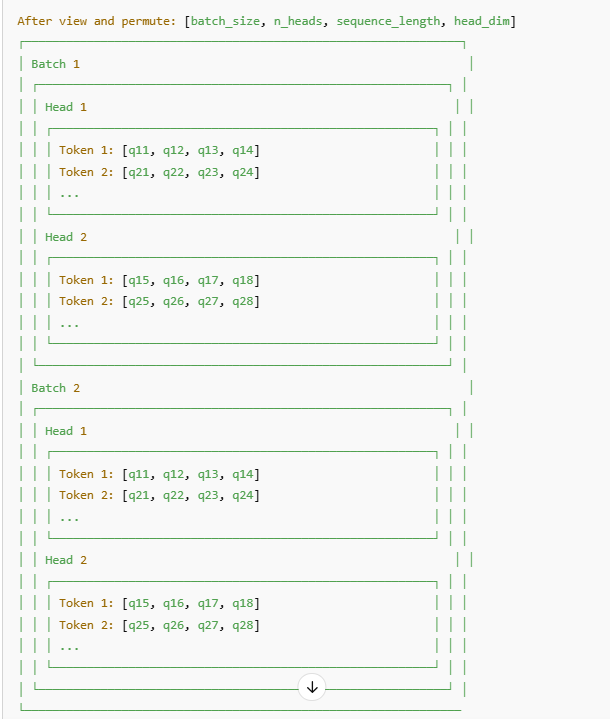

## energy = torch.matmul(Q, K.permute(0, 1, 3, 2)) / self.scale


### - batch_size와 n_heads를 유지한 채 query_len과 head_dim만을 곱하는 이유

각 어텐션 헤드는 입력 시퀸스의 각 단어(query_len)에 대해 특정 차원(head_dim)의 임베딩을 처리한다. 따라서 각 헤드는 [query_len, head_dim] 형태의 행렬을 사용하여 단어 간의 유사도를 계산한다. 이 때, batch_size와 n_heads는 독립적으로 유지되어야 한다. 왜냐하면 실제 연산은 각 헤드별로 이루어지기 때문이다.



### 두 행렬을 곱하여 각 단어들 간의 관계를 파악하는 이유



Q와 K의 곱을 통해 각 단어 쌍 사이의 유사도를 계산한다. 이 유사도는 소프트맥스 함수를 거쳐 어텐션 스코어로 변환된다.

예를 들어,
- query_len = 2
- key_len = 4

- query_len X key_len = [2, 4]

그래서 energy = [batch_size = 128, n_heads = 8, query_lent = 2, key_len = 4] 형태(shape)가 되는거다.

# attention: [batch_size, n_heads, query_len, key_len]

즉, energy[i] [j] [k]는:

- i: 배치에서의 샘플 인덱스

- j: 어텐션 헤드의 인덱스

- k: 쿼리 시퀀스에서의 토큰 인덱스

- z: 키 시퀀스에서의 토큰 인덱스

여기서 energy[i] [j] [k]는 길이가 key_len인 벡터이다.
이 벡터에 softmax를 적용해서 query의 k번째 단어가 key의 각 단어에 얼마나 주목할지를 확률로 바꿔주는 것이다.

예를 들어, batch_size = 2, n_heads = 3, query_len = 4, key_len = 5라면, energy 텐서의 형태는 [2, 3, 4, 5]가 된다.

이때, energy[0][2][1][3]은 다음을 의미한다:

- 0: 첫 번째 배치 샘플​

- 2: 세 번째 어텐션 헤드​

- 1: 쿼리 시퀀스의 두 번째 토큰​

- 3: 키 시퀀스의 네 번째 토큰

결론적으로 dim = -1이 의미하는 것은 key_len를 기준으로 softmax를 적용한다는 것이다.

## x = x.view(batch_size, -1, self.hidden_dim)



- n_heads x head_dim = hidden_dim

  각 헤드에서 구한 벡터들을 하나의 긴 벡터로 이어붙이는 작업이다. (**행렬곱 x**)

  예를 들어,

- 4개의 헤드 [16, 16, 16, 16]이라면, 64차원 벡터로 이어붙이기만 하는 것이다.

In [16]:
# reminding
import torch
import torch.nn as nn

linear_layer = nn.Linear(6,7)
# print(linear_layer.weight)
# print(linear_layer.bias)

Q = torch.randn(2,3,4,6) # [batch_size, n_heads, query_len, head_dim] batch
K = torch.randn(2,3,4,6)

result = torch.matmul(Q, K.permute(0, 1, 3, 2))
print(K)
print(K.permute(0, 1, 3, 2))
print(result)
# print(f"input 값은 : {Q}")
# print(linear_layer(Q).shape)
# print(linear_layer(Q))



tensor([[[[ 8.8294e-01,  7.8148e-01,  3.2838e-01,  5.1603e-01, -1.3085e+00,
            1.3727e+00],
          [ 7.2465e-01, -7.1410e-01,  1.1417e+00, -2.7483e-01, -7.0704e-01,
            1.4023e+00],
          [-3.8802e-01,  1.1296e+00, -3.6264e-01,  8.0003e-01,  1.9960e-01,
           -4.5705e-01],
          [ 6.9923e-01, -1.8236e-01, -2.0666e-03, -1.7882e+00,  5.2356e-01,
            4.8438e-01]],

         [[ 9.5686e-01, -1.7497e+00, -5.8342e-01,  1.0013e+00, -2.2609e-01,
           -4.3093e-02],
          [-5.1056e-01, -1.6290e+00, -1.2436e-01, -2.2482e+00, -1.1189e+00,
           -9.8463e-01],
          [-7.7763e-01,  8.1914e-01,  1.6208e-01, -1.9323e+00,  1.0934e+00,
            6.3391e-01],
          [-7.0973e-01,  5.2351e-01,  3.8090e-01, -1.3550e+00, -9.6819e-02,
            1.2986e+00]],

         [[ 4.5669e-01,  1.5464e+00,  1.0998e+00,  6.7873e-01,  5.0766e-01,
           -4.9549e-01],
          [ 6.4708e-01, -4.8756e-01,  1.4734e+00,  1.2710e+00, -5.4243e-02,
           

### **hidden_dim이 n_heads로 나누어 떨어지도록 설정하는 이유**

멀티헤드 어텐션에서는 위에 설명되어 있듯, Q, K, V의 단계에서부터 헤드의 숫자대로 나누어서 각 헤드가 동일한 차원을 가지도록 한다.

입력 임베딩을 여러 개의 헤드(head)로 분할하여 각 헤드가 서로 다른 부분에 집중할 수 있도록 한다. 이를 위해서 전체 임베딩 차원인 hidden_dim을 n_heads 개수 만큼 나누어 각 헤드의 차원(head_dim)을 결정한다.

이때, hidden_dim이 n_heads로 정확히 나누어떨어지지 않으면 각 헤드에 동일한 차원의 임베딩을 할 수 없으므로, 모델 구조에 문제가 생긴다.

예를 들어,
- hidden_dim = 9
- n_heads = 2

- hidden_dim / n_heads = 9 / 2 = 4.5

정수로 나누어 떨어지지 않으면 각 헤드가 동일한 크기의 임베딩을 할 수 없다.




## Position-Wise FeedForward Architecture 피드포워드 구조

In [17]:
class PositionwiseFeedforwardLayer(nn.Module):
  def __init__(self, hidden_dim, pf_dim, dropout_ratio):
    super(PositionwiseFeedforwardLayer, self).__init__()
    # hidden_dim: 하나의 단어에 대한 임베딩 차원
    # pf_dim: FeedForward 레이어에서의 내부 임베딩 차원
    # dropout_ratio: 드롭아웃 비율

    self.fc_1 = nn.Linear(hidden_dim, pf_dim)
    self.fc_2 = nn.Linear(pf_dim, hidden_dim)

    self.dropout = nn.Dropout(dropout_ratio)

  def forward(self, x):
    # x: [batch_size, seq_len, hidden_dim]
    x = self.dropout(torch.relu(self.fc_1(x)))

    # x: [batch_size, seq_len, pf_dim]
    x = self.fc_2(x)

    # x: [batch_size, seq_len, hidden_dim]
    return x

## Encoder Layer Architecture 인코더 레이어 구조

In [18]:
class EncoderLayer(nn.Module):
    def __init__(self, hidden_dim, n_heads, pf_dim, dropout_ratio, device):
      super().__init__()

      self.attention = MultiHeadAttention(hidden_dim, n_heads, dropout_ratio)

      self.attention_layer_norm = nn.LayerNorm(hidden_dim)

      self.feedforward = PositionwiseFeedforwardLayer(hidden_dim, pf_dim, dropout_ratio)

      self.feedfoward_layer_norm = nn.LayerNorm(hidden_dim)

      self.dropout = nn.Dropout(dropout_ratio)


    def forward(self, src, src_mask):
      # src: [batch_size, src_len, hidden_dim]
      # src_mask: [batch_size, src_len]

      # self attention
      # 필요한 경우 마스크(mask) 행렬을 이용하여 어텐션(attention)할 단어를 조절 가능
      _src, _ = self.attention(src, src, src, src_mask)

      # dropout, residual connection and layer norm
      src = self.attention_layer_norm(src + self.dropout(_src))

      # src: [batch_size, src_len, hidden_dim]

      # position-wise feedforward
      _src = self.feedforward(src)

      # dropout, residual and layer norm
      src = self.feedfoward_layer_norm(src + self.dropout(_src))

      # src: [batch_size, src_len, hidden_dim]

      return src




## Encoder Architecture 인코더 구조

In [19]:
class Encoder(nn.Module):

  def __init__(self, input_dim, hidden_dim, n_layers, n_heads, pf_dim, dropout_ratio, device, max_length = 100):
    super().__init__()
    self.device = device

    self.token_embedding = nn.Embedding(input_dim, hidden_dim)
    self.position_embedding = nn.Embedding(max_length, hidden_dim)

    self.layers = nn.ModuleList([EncoderLayer(hidden_dim, n_heads, pf_dim, dropout_ratio, device) for _ in range(n_layers)])

    self.dropout = nn.Dropout(dropout_ratio)

    self.scale = torch.sqrt(torch.FloatTensor([hidden_dim])).to(device)
  def forward(self, src, src_mask):
    # src: [batch_size, src_len]
    # src_mask: [batch_size, src_len]

    batch_size = src.shape[0]
    src_len = src.shape[1]

    pos = torch.arange(0, src_len).unsqueeze(0).repeat(batch_size, 1).to(self.device)

    # pos: [batch_size, src_len]

    # 소스 문장의 임베딩과 위치 임베딩을 더한 것을 사용
    src = self.dropout((self.token_embedding(src) * self.scale) + self.position_embedding(pos))

    # src: [batch_size, src_len, hidden_dim]

    # 모든 인코더 레이어를 차례대로 거치면서 순전파(forward) 수행
    for layer in self.layers:
      src = layer(src, src_mask)

    # src: [batch_size, src_len, hidden_dim]

    return src # 마지막 레이어의 출력을 반환












### nn.Embedding 예시로 이해하기



```
embedding = nn.Embedding(5, 3)  # 5개의 단어, 3차원 벡터
input1 = torch.tensor([1,2,3,4])

print(input1)
print(embedding(input1))

# 출력값
# tensor([1, 2, 3, 4])
# tensor([[ 1.6044,  0.7248,  0.1794],
#         [-1.1572,  1.2597,  0.2614],
#         [ 1.0712,  0.2459,  2.0993],
#         [-0.5414,  1.0438, -0.1368]], grad_fn=<EmbeddingBackward0>)

# range를 넘어가면 불가능
input2 = torch.tensor([1,2,3,4,5])
```



### pos = torch.arange(0, src_len).unsqueeze(0).repeat(batch_size, 1).to(self.device)



```
src_len = 5
batch_size = 5

torch.arange(0, src_len)
# -> tensor([0,1,2,3,4])

torch.arange(0,src_len).unsqueeze(0)
# -> tensor([[0,1,2,3,4]])

torch.arange(0,src_len).unsqueeze(0).repeat(batch_size, 1)
# -> tensor([
#  [0, 1, 2, 3, 4],
#  [0, 1, 2, 3, 4],
#  [0, 1, 2, 3, 4]
#])

torch.arange(0,src_len).unsqueeze(0).repeat(batch_size, 2)
# ->tensor([[0, 1, 2, 3, 4, 0, 1, 2, 3, 4],
#         [0, 1, 2, 3, 4, 0, 1, 2, 3, 4],
#         [0, 1, 2, 3, 4, 0, 1, 2, 3, 4],
#         [0, 1, 2, 3, 4, 0, 1, 2, 3, 4],
#         [0, 1, 2, 3, 4, 0, 1, 2, 3, 4]])
```



## Decoder Layer Architecture 디코더 레이어 구조

In [20]:
class DecoderLayer(nn.Module):
    def __init__(self, hidden_dim, n_heads, pf_dim, dropout_ratio, device):
      super().__init__()

      self.attention = MultiHeadAttention(hidden_dim, n_heads, dropout_ratio)

      self.encoder_attention = MultiHeadAttention(hidden_dim, n_heads, dropout_ratio)

      self.attention_layer_norm = nn.LayerNorm(hidden_dim)

      self.encoder_attention_layer_norm = nn.LayerNorm(hidden_dim)

      self.feedforward = PositionwiseFeedforwardLayer(hidden_dim, pf_dim, dropout_ratio)

      self.feedfoward_layer_norm = nn.LayerNorm(hidden_dim)

      self.dropout = nn.Dropout(dropout_ratio)


    def forward(self, trg, encoder_src, trg_mask, src_mask):
      # trg: [batch_size, trg_len, hidden_dim]
      # encoder_src: [batch_size, src_len, hidden_dim]
      # trg_mask: [batch_size, trg_len]
      # src_mask: [batch_size, src_len]

      # self attention
      # 자기 자신에 대하여 어텐션(attention)
      _trg, _ = self.attention(trg, trg, trg, trg_mask)

      # dropout, residual connection and layer norm
      trg = self.attention_layer_norm(trg + self.dropout(_trg))

      # trg: [batch_size, trg_len, hidden_dim]

      # encoder attention
      # 디코더의 쿼리(Query)를 이용해 인코더를 어텐션(attention)
      _trg, attention = self.encoder_attention(trg, encoder_src, encoder_src, src_mask)

      # dropout, residual connection and layer norm
      trg = self.encoder_attention_layer_norm(trg + self.dropout(_trg))

      # trg: [batch_size, trg_len, hidden_dim]

      # positionwise feedforward
      _trg = self.feedforward(trg)

      # dropout, residual and layer norm
      trg = self.feedfoward_layer_norm(trg + self.dropout(_trg))

      # trg: [batch_size, trg_len, hidden_dim]
      # attention: [batch_size, n_heads, trg_len, src_len]

      return trg, attention

# Decoder Architecture 디코더 구조

In [21]:
class Decoder(nn.Module):
    def __init__(self, output_dim, hidden_dim, n_layers, n_heads, pf_dim, dropout_ratio, device, max_length=100):
        super().__init__()

        self.device = device

        self.tok_embedding = nn.Embedding(output_dim, hidden_dim)
        self.pos_embedding = nn.Embedding(max_length, hidden_dim)

        self.layers = nn.ModuleList([DecoderLayer(hidden_dim, n_heads, pf_dim, dropout_ratio, device) for _ in range(n_layers)])

        self.fc_out = nn.Linear(hidden_dim, output_dim)

        self.dropout = nn.Dropout(dropout_ratio)

        self.scale = torch.sqrt(torch.FloatTensor([hidden_dim])).to(device)

    def forward(self, trg, enc_src, trg_mask, src_mask):

        # trg: [batch_size, trg_len]
        # enc_src: [batch_size, src_len, hidden_dim]
        # trg_mask: [batch_size, trg_len]
        # src_mask: [batch_size, src_len]

        batch_size = trg.shape[0]
        trg_len = trg.shape[1]

        pos = torch.arange(0, trg_len).unsqueeze(0).repeat(batch_size, 1).to(self.device)

        # pos: [batch_size, trg_len]

        trg = self.dropout((self.tok_embedding(trg) * self.scale) + self.pos_embedding(pos))

        # trg: [batch_size, trg_len, hidden_dim]

        for layer in self.layers:
            # 소스 마스크와 타겟 마스크 모두 사용
            trg, attention = layer(trg, enc_src, trg_mask, src_mask)

        # trg: [batch_size, trg_len, hidden_dim]
        # attention: [batch_size, n_heads, trg_len, src_len]

        output = self.fc_out(trg)

        # output: [batch_size, trg_len, output_dim]

        return output, attention

# Transformer Architecture 트랜스포머 전체

In [22]:
class Transformer(nn.Module):
  def __init__(self, encoder, decoder, src_pad_index, trg_pad_index, device):
    super(Transformer, self).__init__()

    self.encoder = encoder
    self.decoder = decoder

    self.src_pad_idx = src_pad_index
    self.trg_pad_idx = trg_pad_index

    self.device = device

  def make_src_mask(self, src):
    # src: [batch_size, src_len]

    src_mask = (src != self.src_pad_idx).unsqueeze(1).unsqueeze(2)

    # src_mask: [batch_size, 1, 1, src_len]
    # energy : [batch_size, n_heads, query_len, key_len]

    # 같은 차원으로 만들어 주고, 다중헤드 어텐션에서 0 이하인 부분들을 -inf로 바꿔주기 위함

    return src_mask


  def make_trg_mask(self, trg):
    # 목표
    # - pad_mask : padding 위치를 무시
    # - Subsequent mask : 미래 단어를 보지 않게

    # trg: [batch_size, trg_len]


    trg_pad_mask = (trg != self.trg_pad_idx).unsqueeze(1).unsqueeze(2)

    """ (마스크 예시)
        1 0 0 0 0
        1 1 0 0 0
        1 1 1 0 0
        1 1 1 0 0
        1 1 1 0 0
        """

    # trg_pad_mask: [batch_size, 1, 1, trg_len]

    trg_len = trg.shape[1]


    trg_sub_mask = torch.tril(torch.ones((trg_len, trg_len), device = self.device)).bool()

    """ (마스크 예시)
        1 0 0 0 0
        1 1 0 0 0
        1 1 1 0 0
        1 1 1 1 0
        1 1 1 1 1
        """

    # trg_sub_mask: [trg_len, trg_len]
    # 두 마스크의 논리 곲

    trg_mask = trg_pad_mask & trg_sub_mask

    # trg_mask: [batch_size, 1, trg_len, trg_len]

    return trg_mask


  def forward(self, src, trg):

    # src: [batch_size, src_len]
    # trg: [batch_size, trg_len]

    src_mask = self.make_src_mask(src)
    trg_mask = self.make_trg_mask(trg)

    # src_mask: [batch_size, 1, 1, src_len]
    # trg_mask: [batch_size, 1, trg_len, trg_len]

    enc_src = self.encoder(src, src_mask)

    # enc_src: [batch_size, src_len, hidden_dim]

    output, attention = self.decoder(trg, enc_src, trg_mask, src_mask)

    # output: [batch_size, trg_len, output_dim]
    # attention: [batch_size, n_heads, trg_len, src_len]

    return output, attention

### def make_trg_mask(self, trg): 시각적으로 설명


1. 가정

```
trg = [[5, 7, 9, 0, 0]]  # padding 값은 0, batch_size=1, trg_len=5
trg_pad_idx = 0

```
2. trg_pad_mask 생성

  (trg != trg_pad_idx).unsqueeze(1).unsqueeze(2) → shape: [1, 1, 1, 5] → broadcasting 됨

```
trg = [[5, 7, 9, 0, 0]]
pad_mask = [[[[1, 1, 1, 0, 0]]]]
```

3. trg_sub_mask 생성

  torch.tril(torch.ones((5,5)))
```
trg_sub_mask =
[[1, 0, 0, 0, 0],
 [1, 1, 0, 0, 0],
 [1, 1, 1, 0, 0],
 [1, 1, 1, 1, 0],
 [1, 1, 1, 1, 1]]
```

4. pad_mask와 sub_mask를 논리곱(&)
  trg_mask = trg_pad_mask & trg_sub_mask
```
trg_mask =
[[[[1, 0, 0, 0, 0],
   [1, 1, 0, 0, 0],
   [1, 1, 1, 0, 0],
   [0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0]]]]
```





## 학습 코드

In [23]:
input_dim = len(source.vocab)
output_dim = len(target.vocab)
hidden_dim = 256
enc_layers = 3
dec_layers = 3
enc_heads = 8
dec_heads = 8
enc_pf_dim = 512
dec_pf_dim = 512
enc_dropout = 0.1
dec_dropout = 0.1

src_pad_idx = source.vocab.stoi[source.pad_token]
trg_pad_idx = target.vocab.stoi[target.pad_token]

encoder = Encoder(input_dim, hidden_dim, enc_layers, enc_heads, enc_pf_dim, enc_dropout, device)
# Encoder(self, input_dim, hidden_dim, n_layers, n_heads, pf_dim, dropout_ratio, device, max_length = 100)

decoder = Decoder(output_dim, hidden_dim, dec_layers, dec_heads, dec_pf_dim, dec_dropout, device)
# Decoder(self, output_dim, hidden_dim, n_layers, n_heads, pf_dim, dropout_ratio, device, max_length=100)

model = Transformer(encoder, decoder, src_pad_idx, trg_pad_idx, device).to(device)
# Transformer(self, encoder, decoder, src_pad_index, trg_pad_index, device)

print("src vocab size:", model.encoder.token_embedding.num_embeddings)
print("trg vocab size:", model.decoder.tok_embedding.num_embeddings)


src vocab size: 7852
trg vocab size: 5892


- 모델 파라미터 개수

In [24]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 9,037,572 trainable parameters


- 모델 파라미터 초기화

In [25]:
def initialize_weights(m):
    if hasattr(m, 'weight') and m.weight.dim() > 1:
        nn.init.xavier_uniform_(m.weight.data)

model.apply(initialize_weights)

Transformer(
  (encoder): Encoder(
    (token_embedding): Embedding(7852, 256)
    (position_embedding): Embedding(100, 256)
    (layers): ModuleList(
      (0-2): 3 x EncoderLayer(
        (attention): MultiHeadAttention(
          (fc_Q): Linear(in_features=256, out_features=256, bias=True)
          (fc_K): Linear(in_features=256, out_features=256, bias=True)
          (fc_V): Linear(in_features=256, out_features=256, bias=True)
          (fc_o): Linear(in_features=256, out_features=256, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (attention_layer_norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (feedforward): PositionwiseFeedforwardLayer(
          (fc_1): Linear(in_features=256, out_features=512, bias=True)
          (fc_2): Linear(in_features=512, out_features=256, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (feedfoward_layer_norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
   

### - xavier_uniform

입력과 출력의 크기에 따라 가중치 값을 균일하게 분포되도록 초기화하는 방식이다.

weight라는 속성이 있고 그게 다차원이면(Linear, conv2d 등) 초기화 해주는 것이 좋다.


- 학습 및 평가 함수

In [26]:
import torch.optim as optim

# Adam optimizer로 학습 최적화
LEARNING_RATE = 0.0005
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

# 뒷 부분의 패딩(padding)에 대해서는 값 무시
criterion = nn.CrossEntropyLoss(ignore_index = trg_pad_idx)

# 모델 학습(train) 함수
def train(model, iterator, optimizer, criterion, clip):
    model.train() # 학습 모드 활성화 (드롭 아웃, 배치 노멀 등 켜짐)
    epoch_loss = 0 # 전체 손실 저장용

    # 전체 학습 데이터를 확인하며
    for i, batch in enumerate(iterator):
        src = batch.src # 인코더 입력 (source 문장) ex) "나는 학교에 간다"
        trg = batch.trg # 디코더 입력 + 정답 (target 문장) ex) "<sos> I go to school <eos>"

        #print("src shape:", src.shape, src.dtype)
        #print("trg shape:", trg.shape, trg.dtype)
        #print("min index:", src.min().item(), "max index:", src.max().item())
        #print("trg min index:", trg.min().item(), "trg max index:", trg.max().item())

        optimizer.zero_grad() # 기울기 초기화


        # 입력을 할 때는 부터 시작하도록 처리
        output, _ = model(src, trg[:,:-1])

        # trg[:,:-1] : 디코더 입력용 -> 출력 단어의 마지막 토큰 <eos>는 제외
        # ex) [<sos>, I, go, to, school]

        # trg[:, 1:] : 디코더 출력용 -> 출력 단어의 맨 처음 토큰 <sos>는 제외
        # ex) [I, go, to, school, <eos>]

        # trg[:,:-1] -> trg[:,1:] : 모델 예측
        # 입력 -> 정답 예측
        # t = 1 : <sos> -> <I> 예측
        # t = 2 : <I> -> <go> 예측
        # t = 3 : <go> -> <to> 예측
        # t = 4 : <to> -> <school>예측
        # t = 5 : <school> -> <eos> 예측

        # output: [배치 크기, trg_len - 1, output_dim]
        # trg: [배치 크기, trg_len]


        output_dim = output.shape[-1]
        # output: [배치 크기, trg_len - 1, output_dim]

        output = output.contiguous().view(-1, output_dim)
        # 출력 단어의 인덱스 0()은 제외
        trg = trg[:,1:].contiguous().view(-1)

        # output: [배치 크기 * trg_len - 1, output_dim]
        # trg: [배치 크기 * trg len - 1]

        # 모델의 출력 결과와 타겟 문장을 비교하여 손실 계산
        loss = criterion(output, trg)
        loss.backward() # 기울기(gradient) 계산

        # 기울기(gradient) clipping 진행
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)

        # 파라미터 업데이트
        optimizer.step()

        # 전체 손실 값 계산
        epoch_loss += loss.item()

    return epoch_loss / len(iterator)

In [27]:
# 모델 평가(evaluate) 함수
def evaluate(model, iterator, criterion):
    model.eval() # 평가 모드
    epoch_loss = 0

    with torch.no_grad():
        # 전체 평가 데이터를 확인하며
        for i, batch in enumerate(iterator):
            src = batch.src
            trg = batch.trg

            # 출력 단어의 마지막 인덱스()는 제외
            # 입력을 할 때는 부터 시작하도록 처리
            output, _ = model(src, trg[:,:-1])

            # output: [배치 크기, trg_len - 1, output_dim]
            # trg: [배치 크기, trg_len]

            output_dim = output.shape[-1]

            output = output.contiguous().view(-1, output_dim)
            # 출력 단어의 인덱스 0()은 제외
            trg = trg[:,1:].contiguous().view(-1)

            # output: [배치 크기 * trg_len - 1, output_dim]
            # trg: [배치 크기 * trg len - 1]

            # 모델의 출력 결과와 타겟 문장을 비교하여 손실 계산
            loss = criterion(output, trg)

            # 전체 손실 값 계산
            epoch_loss += loss.item()

    return epoch_loss / len(iterator)

In [28]:
import math
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [29]:
import time
import math
import random

N_EPOCHS = 10
CLIP = 1
best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
    start_time = time.time() # 시작 시간 기록

    train_loss = train(model, train_iterator, optimizer, criterion, CLIP)
    valid_loss = evaluate(model, valid_iterator, criterion)

    end_time = time.time() # 종료 시간 기록
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'transformer_german_to_english.pt')

    print(f'Epoch: {epoch + 1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):.3f}')
    print(f'\tValidation Loss: {valid_loss:.3f} | Validation PPL: {math.exp(valid_loss):.3f}')

Epoch: 01 | Time: 12m 56s
	Train Loss: 4.222 | Train PPL: 68.157
	Validation Loss: 3.008 | Validation PPL: 20.251
Epoch: 02 | Time: 14m 45s
	Train Loss: 2.802 | Train PPL: 16.485
	Validation Loss: 2.301 | Validation PPL: 9.982
Epoch: 03 | Time: 19m 56s
	Train Loss: 2.231 | Train PPL: 9.310
	Validation Loss: 1.984 | Validation PPL: 7.271
Epoch: 04 | Time: 19m 58s
	Train Loss: 1.886 | Train PPL: 6.595
	Validation Loss: 1.815 | Validation PPL: 6.143
Epoch: 05 | Time: 19m 53s
	Train Loss: 1.641 | Train PPL: 5.163
	Validation Loss: 1.723 | Validation PPL: 5.603
Epoch: 06 | Time: 18m 31s
	Train Loss: 1.453 | Train PPL: 4.275
	Validation Loss: 1.668 | Validation PPL: 5.300
Epoch: 07 | Time: 12m 47s
	Train Loss: 1.304 | Train PPL: 3.683
	Validation Loss: 1.646 | Validation PPL: 5.187
Epoch: 08 | Time: 12m 50s
	Train Loss: 1.175 | Train PPL: 3.239
	Validation Loss: 1.628 | Validation PPL: 5.093
Epoch: 09 | Time: 13m 0s
	Train Loss: 1.067 | Train PPL: 2.908
	Validation Loss: 1.629 | Validation P

In [30]:
# 학습된 모델 저장
from google.colab import files

files.download('transformer_german_to_english.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
model.load_state_dict(torch.load('transformer_german_to_english.pt'))

test_loss = evaluate(model, test_iterator, criterion)

print(f'Test Loss: {test_loss:.3f} | Test PPL: {math.exp(test_loss):.3f}')

Test Loss: 1.669 | Test PPL: 5.306


# 번역 해보기

In [32]:
# 번역(translation) 함수
def translate_sentence(sentence, src_field, trg_field, model, device, max_len=50, logging=True):
    model.eval() # 평가 모드

    if isinstance(sentence, str):
        nlp = spacy.load('de')
        tokens = [token.text.lower() for token in nlp(sentence)]
    else:
        tokens = [token.lower() for token in sentence]

    # 처음에  토큰, 마지막에  토큰 붙이기
    tokens = [src_field.init_token] + tokens + [src_field.eos_token]
    if logging:
        print(f"전체 소스 토큰: {tokens}")

    src_indexes = [src_field.vocab.stoi[token] for token in tokens]
    if logging:
        print(f"소스 문장 인덱스: {src_indexes}")

    src_tensor = torch.LongTensor(src_indexes).unsqueeze(0).to(device)

    # 소스 문장에 따른 마스크 생성
    src_mask = model.make_src_mask(src_tensor)

    # 인코더(endocer)에 소스 문장을 넣어 출력 값 구하기
    with torch.no_grad():
        enc_src = model.encoder(src_tensor, src_mask)

    # 처음에는  토큰 하나만 가지고 있도록 하기
    trg_indexes = [trg_field.vocab.stoi[trg_field.init_token]]

    for i in range(max_len):
        trg_tensor = torch.LongTensor(trg_indexes).unsqueeze(0).to(device)

        # 출력 문장에 따른 마스크 생성
        trg_mask = model.make_trg_mask(trg_tensor)

        with torch.no_grad():
            output, attention = model.decoder(trg_tensor, enc_src, trg_mask, src_mask)

        # 출력 문장에서 가장 마지막 단어만 사용
        pred_token = output.argmax(2)[:,-1].item()
        trg_indexes.append(pred_token) # 출력 문장에 더하기

        # 를 만나는 순간 끝
        if pred_token == trg_field.vocab.stoi[trg_field.eos_token]:
            break

    # 각 출력 단어 인덱스를 실제 단어로 변환
    trg_tokens = [trg_field.vocab.itos[i] for i in trg_indexes]

    # 첫 번째 는 제외하고 출력 문장 반환
    return trg_tokens[1:], attention

In [35]:
example_idx = 12

src = vars(test_dataset.examples[example_idx])['src']
trg = vars(test_dataset.examples[example_idx])['trg']

print(f'소스 문장: {src}')
print(f'타겟 문장: {trg}')

translation, attention = translate_sentence(src, source, target, model, device, logging=True)

print("모델 출력 결과:", " ".join(translation))

소스 문장: ['eine', 'frau', ',', 'die', 'in', 'einer', 'küche', 'eine', 'schale', 'mit', 'essen', 'hält', '.']
타겟 문장: ['a', 'woman', 'holding', 'a', 'bowl', 'of', 'food', 'in', 'a', 'kitchen', '.']
전체 소스 토큰: ['', 'eine', 'frau', ',', 'die', 'in', 'einer', 'küche', 'eine', 'schale', 'mit', 'essen', 'hält', '.', '']
소스 문장 인덱스: [2, 7, 15, 8, 16, 6, 13, 308, 7, 2988, 10, 110, 36, 3, 2]
모델 출력 결과: a woman holding a bowl in a bowl of food . 
